## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'coco-indoor' 
TRANSFORM = 'gabor'
CHANNEL = ''
PARAM_CSV = "gabor_new.csv"

In [2]:
path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
if CHANNEL:
    path_list.append(CHANNEL)
print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")
FULL_DATA_NAME='-'.join(path_list)

Name the notebook:
gabor_indoor_coco.ipynb


In [3]:
import git
from pathlib import Path
import os
import pandas as pd
import numpy as np

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)

assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)

GROUP = 'layer' if TRANSFORM.split("-")[0] == 'wavelet' else ('band' if TRANSFORM.split("-")[0] == 'fourier' else 'filter_idx')
RERUN = False
SKIP_OPTIMIZE_STEP = False
CWD

'/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/results/case-studies/coco/indoor/gabor'

In [4]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from learned import *
os.chdir(CWD)
np.random.seed(0)

In [5]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}-size.pickle'))

# treat all as nonskewed for gabor grouped over frequency
nonskewed_filter_idxs = list(group_data_map.keys())

df = pd.read_csv(os.path.join(ROOT_DIR, "gabor", PARAM_CSV), index_col="index")
df = df.sort_index()

filter_group_map = (df.loc[:, ["wave_number", "aspect_ratio", "frequency"]]
                      .apply(tuple, axis=1)
                      .to_dict())

filter_group_map

{0: (2.0, 0.5, 0.044),
 1: (2.0, 0.5, 0.065),
 2: (2.0, 0.5, 0.096),
 3: (2.0, 0.5, 0.141),
 4: (2.0, 0.5, 0.208),
 5: (2.0, 0.5, 0.306),
 6: (2.0, 0.5, 0.45),
 7: (2.0, 1.0, 0.044),
 8: (2.0, 1.0, 0.065),
 9: (2.0, 1.0, 0.096),
 10: (2.0, 1.0, 0.141),
 11: (2.0, 1.0, 0.208),
 12: (2.0, 1.0, 0.306),
 13: (2.0, 1.0, 0.45),
 14: (3.0, 0.5, 0.044),
 15: (3.0, 0.5, 0.065),
 16: (3.0, 0.5, 0.096),
 17: (3.0, 0.5, 0.141),
 18: (3.0, 0.5, 0.208),
 19: (3.0, 0.5, 0.306),
 20: (3.0, 0.5, 0.45),
 21: (3.0, 1.0, 0.044),
 22: (3.0, 1.0, 0.065),
 23: (3.0, 1.0, 0.096),
 24: (3.0, 1.0, 0.141),
 25: (3.0, 1.0, 0.208),
 26: (3.0, 1.0, 0.306),
 27: (3.0, 1.0, 0.45),
 28: (4.0, 0.5, 0.044),
 29: (4.0, 0.5, 0.065),
 30: (4.0, 0.5, 0.096),
 31: (4.0, 0.5, 0.141),
 32: (4.0, 0.5, 0.208),
 33: (4.0, 0.5, 0.306),
 34: (4.0, 0.5, 0.45),
 35: (4.0, 1.0, 0.044),
 36: (4.0, 1.0, 0.065),
 37: (4.0, 1.0, 0.096),
 38: (4.0, 1.0, 0.141),
 39: (4.0, 1.0, 0.208),
 40: (4.0, 1.0, 0.306),
 41: (4.0, 1.0, 0.45)}

In [6]:
if 'fourier' in TRANSFORM:
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
elif 'wavelet' in TRANSFORM:
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
elif 'learned' in TRANSFORM: 
    GROUPS = nonskewed_filter_idxs # can set to filter_group_map.keys() to include all prepared filters
elif 'gabor' in TRANSFORM: 
    GROUPS = nonskewed_filter_idxs # can set to filter_group_map.keys() to include all prepared filters

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = sorted([os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)])
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[:6]: # TODO For quick testing purposes. Currently excluding 20000 CDFs. Use cdfs_list[5:6] to access CDFs/_test
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # TODO For quick testing purposes
group_total_samples

{0: 196608000,
 1: 196608000,
 2: 196608000,
 3: 196608000,
 4: 196608000,
 5: 196608000,
 6: 196608000,
 7: 196608000,
 8: 196608000,
 9: 196608000,
 10: 196608000,
 11: 196608000,
 12: 196608000,
 13: 196608000,
 14: 196608000,
 15: 196608000,
 16: 196608000,
 17: 196608000,
 18: 196608000,
 19: 196608000}

Running 12760 CDFs


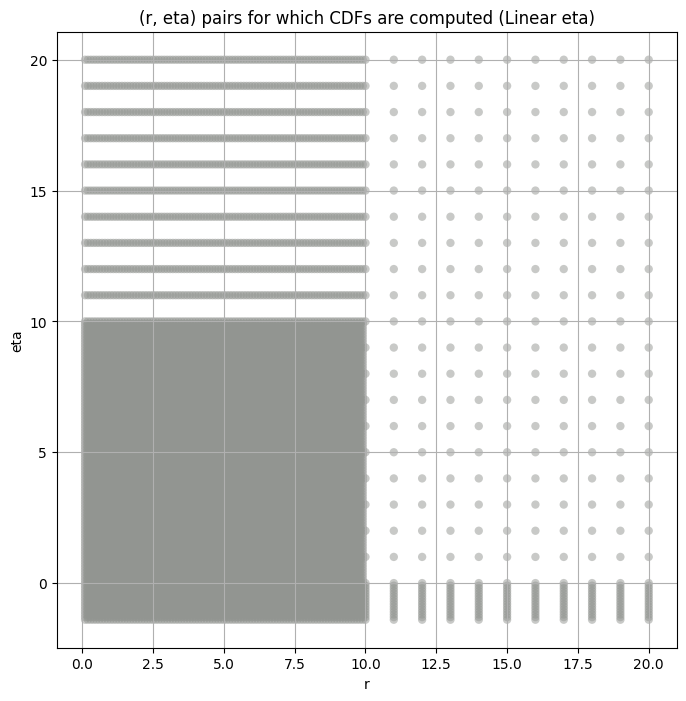

,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.1, -1.4), <scipy.interpolate._fitpack2.Int...",0.1,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.628800e+06,554265.000000
1,"((0.1, -1.3), <scipy.interpolate._fitpack2.Int...",0.1,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.991680e+07,96192.272727
2,"((0.1, -1.2), <scipy.interpolate._fitpack2.Int...",0.1,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,2.395008e+08,29390.000000
3,"((0.1, -1.1), <scipy.interpolate._fitpack2.Int...",0.1,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.037837e+09,11997.692308
4,"((0.1, -1.0), <scipy.interpolate._fitpack2.Int...",0.1,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.632429e+09,5874.890110


In [7]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
fine_cdfs_df = all_cdfs_df.copy()
all_cdfs_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 1) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 1) == all_cdfs_df['eta'])]
all_cdfs_df = all_cdfs_df.reset_index(drop=True)
all_cdfs = {x[0] : x[1] for x in all_cdfs_df["(r,eta),cdf"]}
                                             
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
temp_cdf = all_cdfs_df
print(f"Running {all_cdfs_df.shape[0]} CDFs")
create_scatter_plot(all_cdfs_df);
all_cdfs_df.head()

## Bootstrapping the Variance and Kurtosis

In [8]:
n_bootstrap = int(1e3) # TODO For quick testing purposes
bootstrap_size = int(1e3) # TODO For quick testing purposes
ci = 0.99

In [9]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if True or not master_df_var_kurt_path.exists(): # TODO For quick testing purposes
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}: {str(filter_group_map[group])}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]
        master_df.loc[group, 'filter_group'] = str(filter_group_map[group])

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Filter_idx 0: (2.0, 0.5, 0.044)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 1: (2.0, 0.5, 0.065)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 2: (2.0, 0.5, 0.096)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 3: (2.0, 0.5, 0.141)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 4: (2.0, 0.5, 0.208)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 5: (2.0, 0.5, 0.306)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 6: (2.0, 0.5, 0.45)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 7: (2.0, 1.0, 0.044)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 8: (2.0, 1.0, 0.065)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 9: (2.0, 1.0, 0.096)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 10: (2.0, 1.0, 0.141)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 11: (2.0, 1.0, 0.208)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 12: (2.0, 1.0, 0.306)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 13: (2.0, 1.0, 0.45)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 14: (3.0, 0.5, 0.044)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 15: (3.0, 0.5, 0.065)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 16: (3.0, 0.5, 0.096)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 17: (3.0, 0.5, 0.141)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 18: (3.0, 0.5, 0.208)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 19: (3.0, 0.5, 0.306)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,filter_group
filter_idx,,,,,,,,
0,23.807522,18.785255,30.747663,5.610622,2.439526,32.892960,196608000.0,"(2.0, 0.5, 0.044)"
1,5.429975,4.218070,7.179698,8.194880,3.400279,59.302552,196608000.0,"(2.0, 0.5, 0.065)"
2,1.271452,0.972389,1.702676,10.514228,4.390004,56.975394,196608000.0,"(2.0, 0.5, 0.096)"
3,0.324462,0.230241,0.649374,30.116787,6.351789,266.620959,196608000.0,"(2.0, 0.5, 0.141)"
4,0.075696,0.048990,0.158161,40.344238,9.440216,298.473739,196608000.0,"(2.0, 0.5, 0.208)"
5,32.277842,25.822467,40.224109,6.244556,2.334400,31.309672,196608000.0,"(2.0, 0.5, 0.306)"
6,7.544956,5.816212,10.233245,8.714436,3.558453,64.691319,196608000.0,"(2.0, 0.5, 0.45)"
7,1.885680,1.403464,3.685446,22.288832,5.006912,264.312884,196608000.0,"(2.0, 1.0, 0.044)"
8,0.426052,0.290551,0.793684,28.137059,6.635847,208.915075,196608000.0,"(2.0, 1.0, 0.065)"


## Initial Grid Search and Hypothesis Test Plots

In [10]:
EXCLUDE_CUTOFFS = [0, 50, 100, 200] # TODO For quick testing purposes
SCALE_CAP = 1e5

In [11]:
augmented_var_df_path = Path(os.path.join(CWD, "CSVs", "augmented_var_df.csv"))
augmented_var_df = var_kurt_df[['obs_var']].copy()
augmented_var_df
for val in EXCLUDE_CUTOFFS:
    temp_arr = []
    for group in GROUPS:
        if val != 0:
            temp_arr.append(np.var(group_data_map[group][val:-val]))
        else:
            temp_arr.append(np.var(group_data_map[group]))

    augmented_var_df[f"var_exclude_{val}"] = temp_arr
augmented_var_df

,obs_var,var_exclude_0,var_exclude_50,var_exclude_100,var_exclude_200
filter_idx,,,,,
0,23.807522,23.807522,22.798944,22.224754,21.329938
1,5.429975,5.429975,5.154058,4.999912,4.761980
2,1.271452,1.271452,1.196351,1.153567,1.088380
3,0.324462,0.324462,0.295915,0.282522,0.262605
4,0.075696,0.075696,0.067158,0.063251,0.057653
5,32.277842,32.277842,30.773239,29.922762,28.629317
6,7.544956,7.544956,7.147005,6.924402,6.583147
7,1.885680,1.885680,1.738288,1.671393,1.571190
8,0.426052,0.426052,0.384359,0.365353,0.337768


In [12]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))

rEtaKsstats_dict = dict()

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS): # TODO For quick testing purposes
        print(f"####\n{GROUP.capitalize()}, {group}: {str(filter_group_map[group])}")
        sample = group_data_map[group]
        if len(sample) == 0:
            continue
        group_cdfs_df = all_cdfs_df.copy()
        master_df.loc[group, 'kstest_stat_initial'] = 1

        for j in range(len(EXCLUDE_CUTOFFS)):

            exclude_cutoff = EXCLUDE_CUTOFFS[j]
            exclude_cutoff = int(exclude_cutoff)

            if exclude_cutoff == 0:
                augmented_var = np.var(group_data_map[group]) 
            else:
                augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])
                if augmented_var == np.var(group_data_map[group]):
                    continue 
                
            group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
            ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True, scales=group_cdfs_df['scale'])
            augmented_var_df.loc[group, f"kstest_stat_{exclude_cutoff}"] = min_stat
            group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] = ksstats
            
            print(group, exclude_cutoff, min_stat, augmented_var)
            
            if (min_stat < master_df.loc[group, 'kstest_stat_initial']) and not np.isclose(min_stat, master_df.loc[group, 'kstest_stat_initial'], 1e-6):
                inital_min_stat = min_stat
                inital_best_param = initial_param
                master_df.loc[group, 'kstest_stat_initial'] = min_stat
                initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
                master_df.loc[group, 'initial_scale'] = initial_scale
                master_df.loc[group, 'initial_exclude_cutoff'] = exclude_cutoff
                master_df.loc[group, 'best_augmented_var'] = augmented_var
        
        ksstats = group_cdfs_df[f"ksstat_exclude_{int(master_df.loc[group, 'initial_exclude_cutoff'])}"]
            
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

        group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
        group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

        group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

        group_dict = {'r' : group_cdfs_df['r'], 'eta' : group_cdfs_df['eta']}
        group_dict.update({f'ksstat_exclude_{exclude_cutoff}' : group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] for exclude_cutoff in EXCLUDE_CUTOFFS[:j+1]})
        rEtaKsstats_dict[group] = group_dict

        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdfs_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group}, {str(filter_group_map[group])}: {', '.join([col[5:].capitalize() for col in cols])} Exclude:{master_df.loc[group, 'initial_exclude_cutoff']}", 
                            target_var = None,
                            best_param = inital_best_param,
                            best_ksstat=inital_min_stat
                            )
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)

        # Optional: 
        # Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdfs_df, var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdfs_df, kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    # new: add parameter information
    master_df.insert(0, 'params', master_df.index.map(filter_group_map))

    master_df.to_csv(master_df_combo_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)
    augmented_var_df.to_csv(augmented_var_df_path)

augmented_var_df = pd.read_csv(augmented_var_df_path, index_col=GROUP)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df

,params,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,filter_group,kstest_stat_initial,initial_r,initial_eta,initial_scale,initial_exclude_cutoff,best_augmented_var,kstest_stat_cutoff_0.05
filter_idx,,,,,,,,,,,,,,,,
0,"(2.0, 0.5, 0.044)",23.807522,18.785255,30.747663,5.610622,2.439526,32.892960,196608000.0,"(2.0, 0.5, 0.044)",0.006087,5.0,-1.1,8.288251e+01,100.0,22.224754,0.000097
1,"(2.0, 0.5, 0.065)",5.429975,4.218070,7.179698,8.194880,3.400279,59.302552,196608000.0,"(2.0, 0.5, 0.065)",0.007747,1.0,-1.1,1.249978e+01,100.0,4.999912,0.000097
2,"(2.0, 0.5, 0.096)",1.271452,0.972389,1.702676,10.514228,4.390004,56.975394,196608000.0,"(2.0, 0.5, 0.096)",0.010954,0.5,-1.0,5.767834e-01,100.0,1.153567,0.000097
3,"(2.0, 0.5, 0.141)",0.324462,0.230241,0.649374,30.116787,6.351789,266.620959,196608000.0,"(2.0, 0.5, 0.141)",0.007443,0.4,-1.0,6.064174e-02,50.0,0.295915,0.000097
4,"(2.0, 0.5, 0.208)",0.075696,0.048990,0.158161,40.344238,9.440216,298.473739,196608000.0,"(2.0, 0.5, 0.208)",0.007319,0.2,-0.7,1.126428e-05,0.0,0.075696,0.000097
5,"(2.0, 0.5, 0.306)",32.277842,25.822467,40.224109,6.244556,2.334400,31.309672,196608000.0,"(2.0, 0.5, 0.306)",0.003672,1.4,-1.0,7.743078e+01,100.0,29.922762,0.000097
6,"(2.0, 0.5, 0.45)",7.544956,5.816212,10.233245,8.714436,3.558453,64.691319,196608000.0,"(2.0, 0.5, 0.45)",0.005806,0.7,-1.0,9.005299e+00,0.0,7.544956,0.000097
7,"(2.0, 1.0, 0.044)",1.885680,1.403464,3.685446,22.288832,5.006912,264.312884,196608000.0,"(2.0, 1.0, 0.044)",0.007285,0.5,-1.0,8.691441e-01,50.0,1.738288,0.000097
8,"(2.0, 1.0, 0.065)",0.426052,0.290551,0.793684,28.137059,6.635847,208.915075,196608000.0,"(2.0, 1.0, 0.065)",0.007156,0.3,-0.8,6.665864e-03,50.0,0.384359,0.000097


## Optimization

In [13]:
master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
master_df[f'best_r'] = master_df['initial_r']
master_df[f'best_eta'] = master_df['initial_eta']
master_df[f'best_scale'] = master_df['initial_scale']
master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

In [14]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS))) # By default, does one iteration per group
NUM_SAMPLES_OPTIMIZE = 2000
EXCLUDE_CUTOFFS_OPTIMIZE = np.arange(100, -101, -25)

if RERUN or not master_df_optimized_path.exists():

    if SKIP_OPTIMIZE_STEP:

        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
        master_df[f'best_scale'] = master_df['initial_scale']
        master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

    else:
        for group in GROUPS: # TODO For quick testing purposes
            print(f"{GROUP.capitalize()} {group}, {str(filter_group_map[group])}:")
            master_df.loc[group, 'kstest_stat_best'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r'] = master_df.loc[group, 'initial_r']
            master_df.loc[group, 'best_eta'] = master_df.loc[group, 'initial_eta']
            master_df.loc[group, 'best_scale'] = master_df.loc[group, 'initial_scale']

            sample = group_data_map[group]
            if len(sample) == 0:
                continue
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            eps = 0.5
            group_cdfs_df = fine_cdfs_df[(np.abs(master_df.loc[group, 'initial_r'] - fine_cdfs_df['r']) < eps) & 
                                        (np.abs(master_df.loc[group, 'initial_eta'] - fine_cdfs_df['eta']) < eps)].reset_index(drop=True)
            group_cdfs = {x[0]:x[1] for x in group_cdfs_df['(r,eta),cdf']}

            for adjust_exclude_cutoff in EXCLUDE_CUTOFFS_OPTIMIZE: # -50, -25, 0, 25, 50
                
                exclude_cutoff = int(max(0, adjust_exclude_cutoff + master_df.loc[group, 'initial_exclude_cutoff']))
                
                if exclude_cutoff == 0:
                    augmented_var = np.var(group_data_map[group])
                else:
                    augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])                       

                group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
                ksstats, initial_param, min_stat = gridsearch(sample, group_cdfs, debug=True, scales=group_cdfs_df['scale'])
                
                cutoff_label = generate_cutoff_label(adjust_exclude_cutoff)

                augmented_var_df.loc[group, f"kstest_stat_{cutoff_label}"] = min_stat
                group_cdfs_df[f'ksstat_exclude_{cutoff_label}'] = ksstats
                
                print(f"{GROUP} {group}, {master_df.loc[group, 'initial_exclude_cutoff']} + {adjust_exclude_cutoff} = {exclude_cutoff}, ksstat: {min_stat}, var: {augmented_var}")
                best_adjust = 0

                if min_stat < master_df.loc[group, 'kstest_stat_best']:

                    inital_min_stat = min_stat
                    inital_best_param = initial_param
                    master_df.loc[group, 'kstest_stat_best'] = min_stat
                    initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                    master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = initial_param
                    master_df.loc[group, 'best_scale'] = initial_scale
                    master_df.loc[group, 'best_exclude_cutoff'] = exclude_cutoff
                    master_df.loc[group, 'best_augmented_var'] = augmented_var
                    augmented_var_df.loc[group, 'best_augmented_var'] = augmented_var
                    best_adjust = adjust_exclude_cutoff

                if exclude_cutoff == 0:
                    break

            cutoff_label = generate_cutoff_label(best_adjust)
            ksstats = group_cdfs_df[f"ksstat_exclude_{cutoff_label}"]
            
            print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
            
            cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
            master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

            best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

            group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
            group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

            group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

            group_dict = rEtaKsstats_dict[group]
            group_dict.update({'r_optimize' : group_cdfs_df['r'], 'eta_optimize' : group_cdfs_df['eta'], f'ksstat_exclude_{cutoff_label}' : ksstats})
            rEtaKsstats_dict[group] = group_dict

            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(group_cdfs_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group}, {str(filter_group_map[group])}: zoomed in: {', '.join([col[5:].capitalize() for col in cols])}  Exclude:{master_df.loc[group, 'best_exclude_cutoff']}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']),
                                best_ksstat=master_df.loc[group, 'kstest_stat_best'])
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'initial_exclude_cutoff', 'best_r', 'best_eta', 'best_scale', 'kstest_stat_best', 'best_exclude_cutoff', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    augmented_var_df.to_csv(augmented_var_df_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)

rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
augmented_var_df = pd.read_csv(augmented_var_df_path, index_col = GROUP)
master_df

,params,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,filter_group,kstest_stat_initial,...,initial_scale,initial_exclude_cutoff,best_augmented_var,kstest_stat_cutoff_0.05,kstest_stat_best,best_r,best_eta,best_scale,best_exclude_cutoff,n_pval_0.05
filter_idx,,,,,,,,,,,,,,,,,,,,,
0,"(2.0, 0.5, 0.044)",23.807522,18.785255,30.747663,5.610622,2.439526,32.892960,196608000.0,"(2.0, 0.5, 0.044)",0.006087,...,8.288251e+01,100.0,21.329938,0.000097,0.005770,5.00,-1.09,7.811898e+01,200.0,54000
1,"(2.0, 0.5, 0.065)",5.429975,4.218070,7.179698,8.194880,3.400279,59.302552,196608000.0,"(2.0, 0.5, 0.065)",0.007747,...,1.249978e+01,100.0,5.072284,0.000097,0.007016,0.90,-1.09,1.107702e+01,75.0,36000
2,"(2.0, 0.5, 0.096)",1.271452,0.972389,1.702676,10.514228,4.390004,56.975394,196608000.0,"(2.0, 0.5, 0.096)",0.010954,...,5.767834e-01,100.0,1.271452,0.000097,0.008271,0.50,-1.03,6.972206e-01,0.0,27000
3,"(2.0, 0.5, 0.141)",0.324462,0.230241,0.649374,30.116787,6.351789,266.620959,196608000.0,"(2.0, 0.5, 0.141)",0.007443,...,6.064174e-02,50.0,0.324462,0.000097,0.006536,0.31,-0.90,1.030297e-02,0.0,45562
4,"(2.0, 0.5, 0.208)",0.075696,0.048990,0.158161,40.344238,9.440216,298.473739,196608000.0,"(2.0, 0.5, 0.208)",0.007319,...,1.126428e-05,0.0,0.075696,0.000097,0.006589,0.20,-0.69,1.077919e-05,0.0,40500
5,"(2.0, 0.5, 0.306)",32.277842,25.822467,40.224109,6.244556,2.334400,31.309672,196608000.0,"(2.0, 0.5, 0.306)",0.003672,...,7.743078e+01,100.0,32.277842,0.000097,0.002784,1.00,-0.97,6.090159e+01,0.0,243000
6,"(2.0, 0.5, 0.45)",7.544956,5.816212,10.233245,8.714436,3.558453,64.691319,196608000.0,"(2.0, 0.5, 0.45)",0.005806,...,9.005299e+00,0.0,7.544956,0.000097,0.005340,0.69,-1.00,8.754677e+00,0.0,68343
7,"(2.0, 1.0, 0.044)",1.885680,1.403464,3.685446,22.288832,5.006912,264.312884,196608000.0,"(2.0, 1.0, 0.044)",0.007285,...,8.691441e-01,50.0,1.885680,0.000097,0.005900,0.48,-1.00,8.188176e-01,0.0,54000
8,"(2.0, 1.0, 0.065)",0.426052,0.290551,0.793684,28.137059,6.635847,208.915075,196608000.0,"(2.0, 1.0, 0.065)",0.007156,...,6.665864e-03,50.0,0.426052,0.000097,0.004594,0.30,-0.85,8.809871e-03,0.0,91125


## Comparing Empirical and Computed CDF/PDF

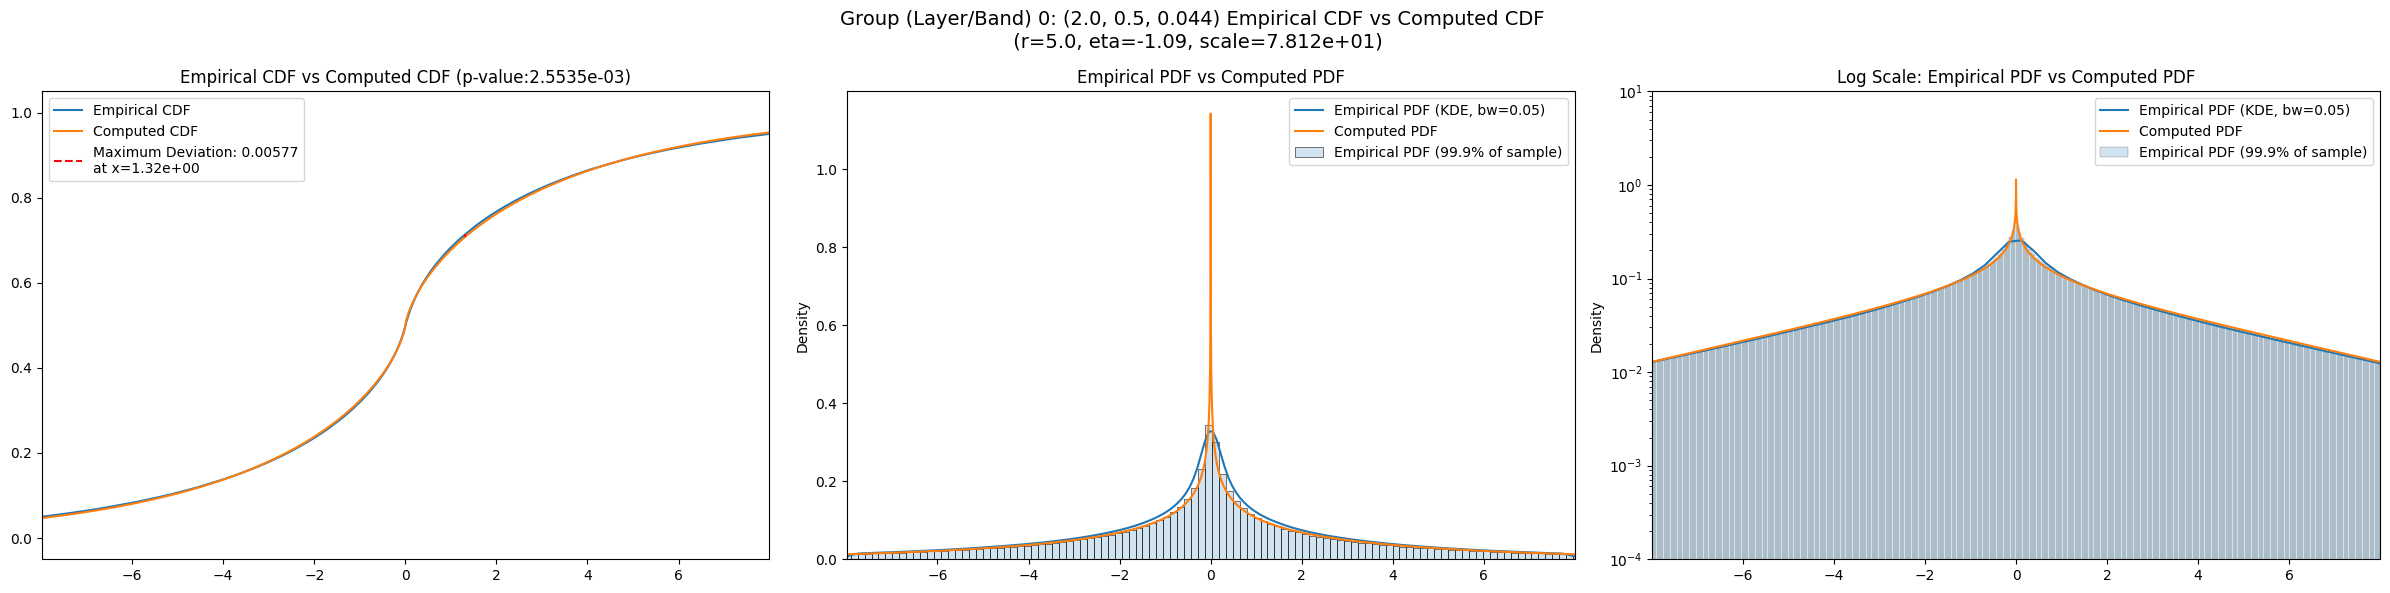

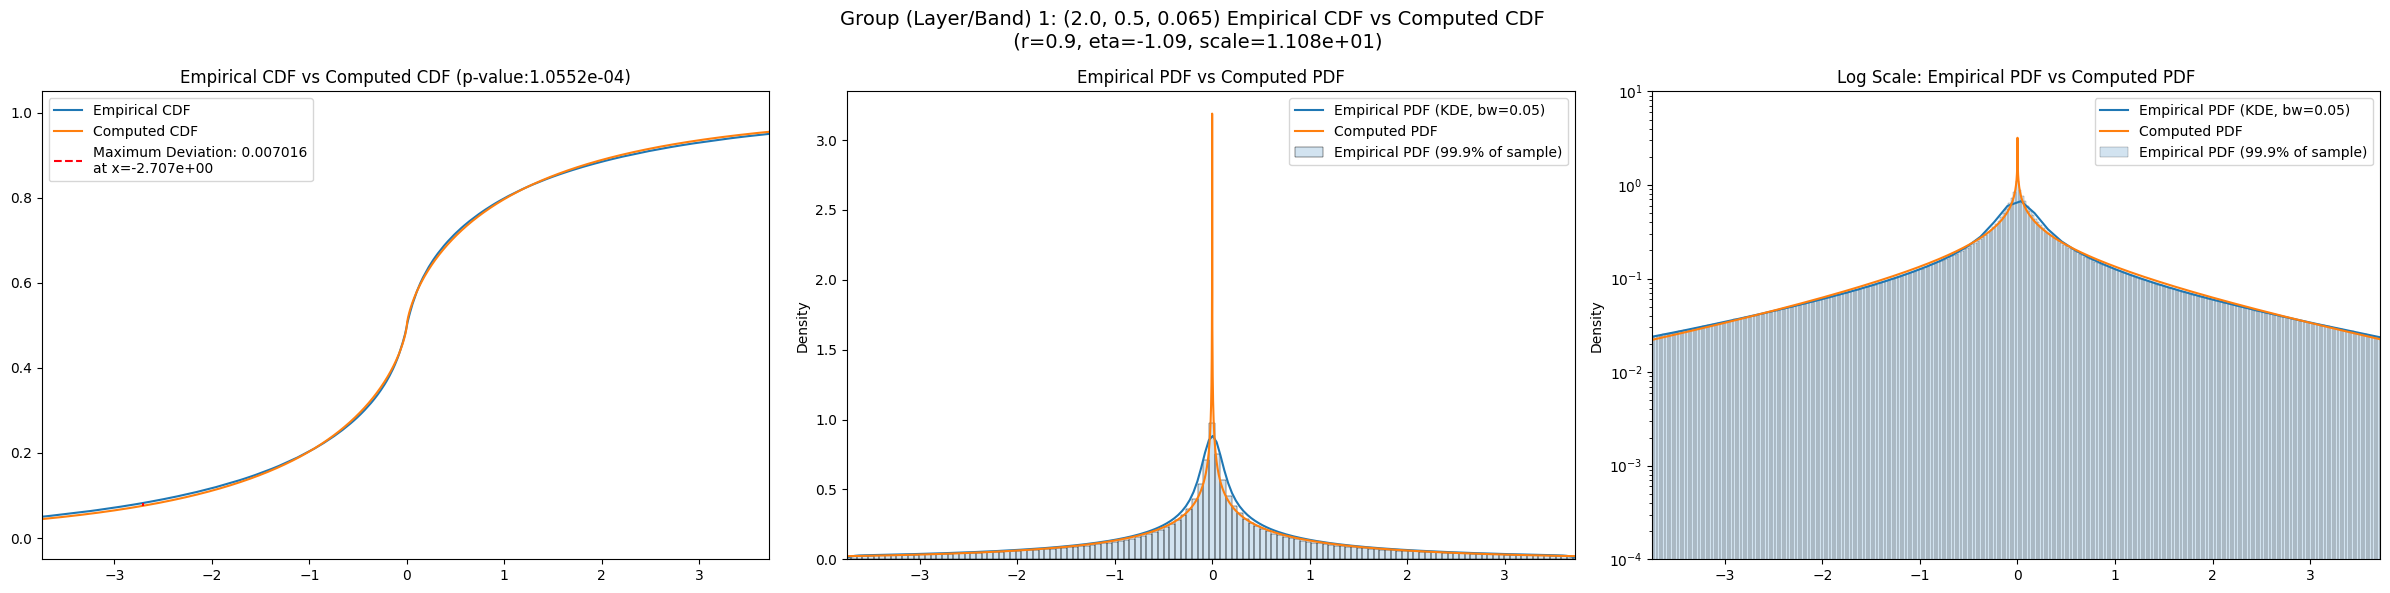

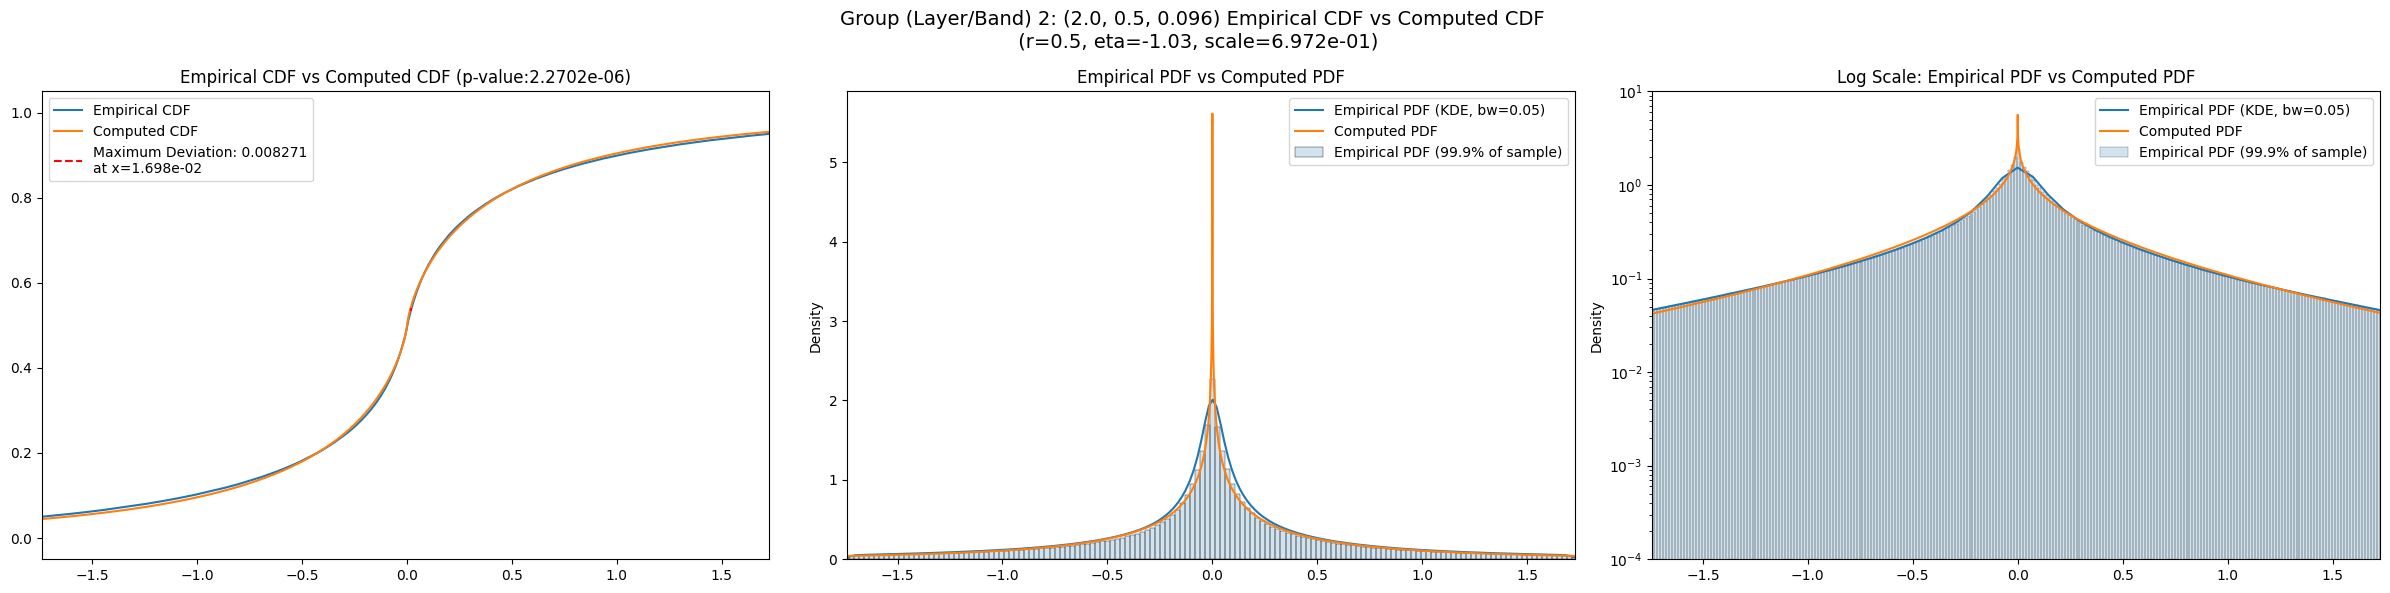

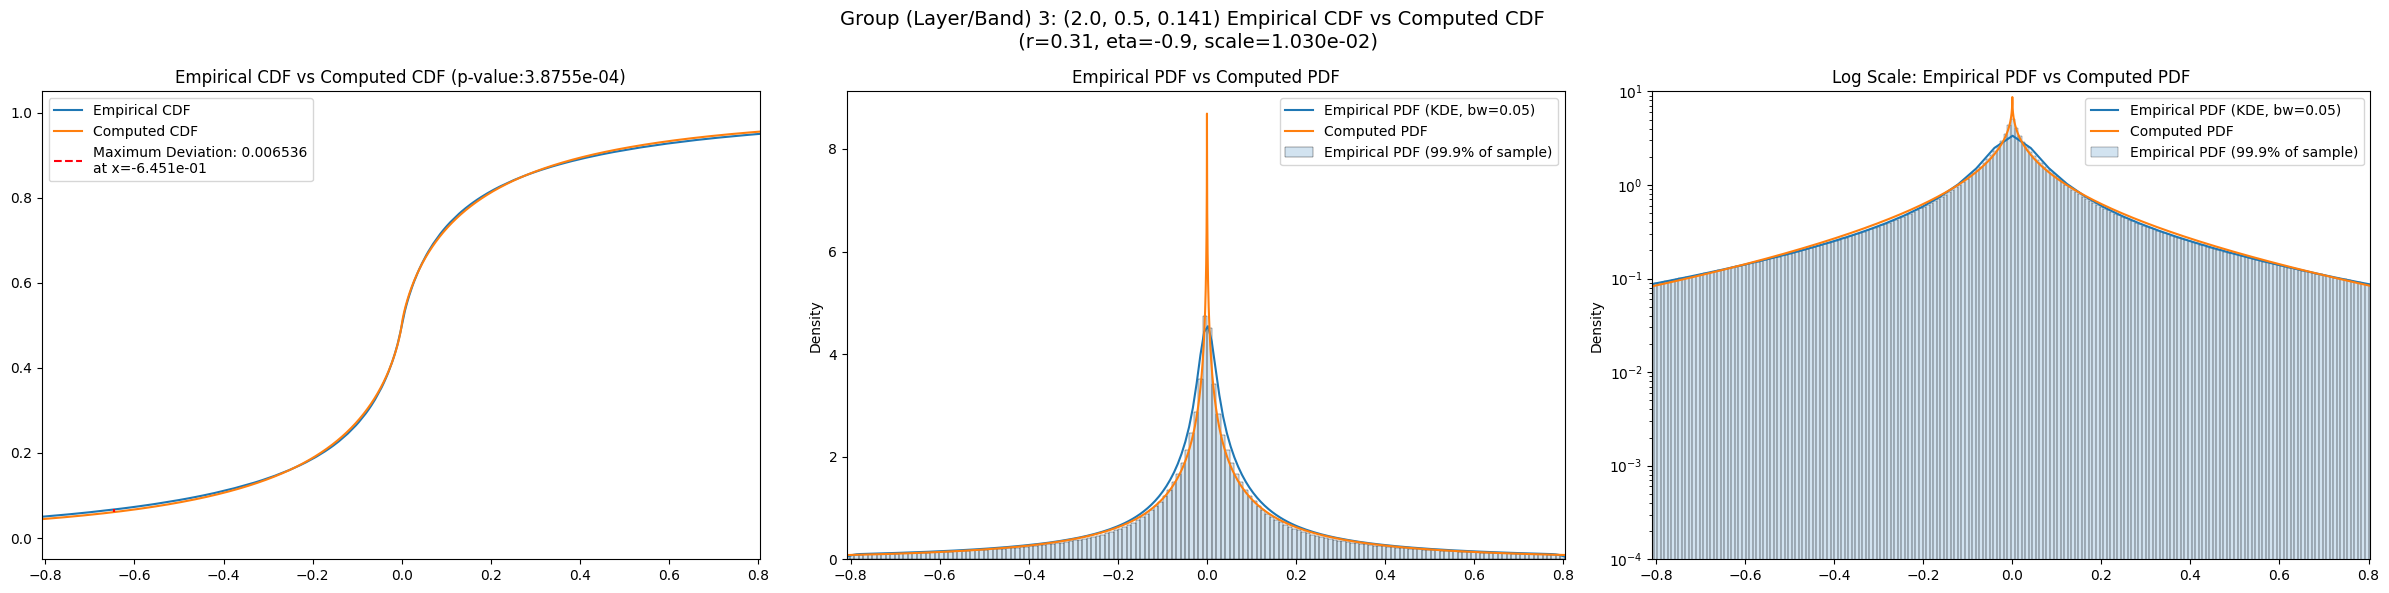

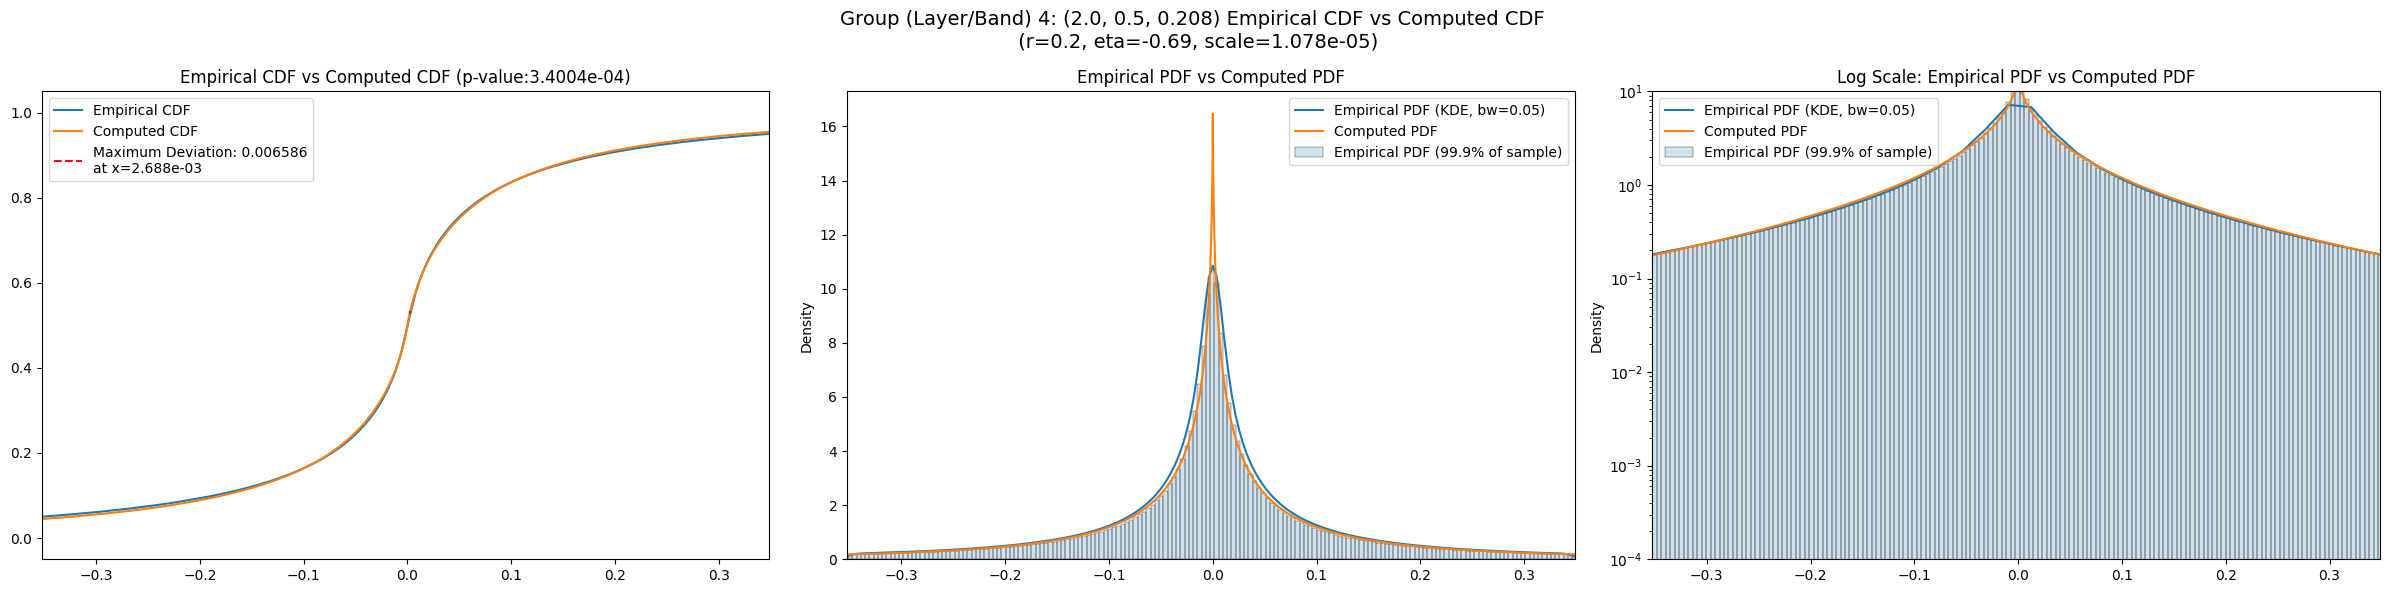

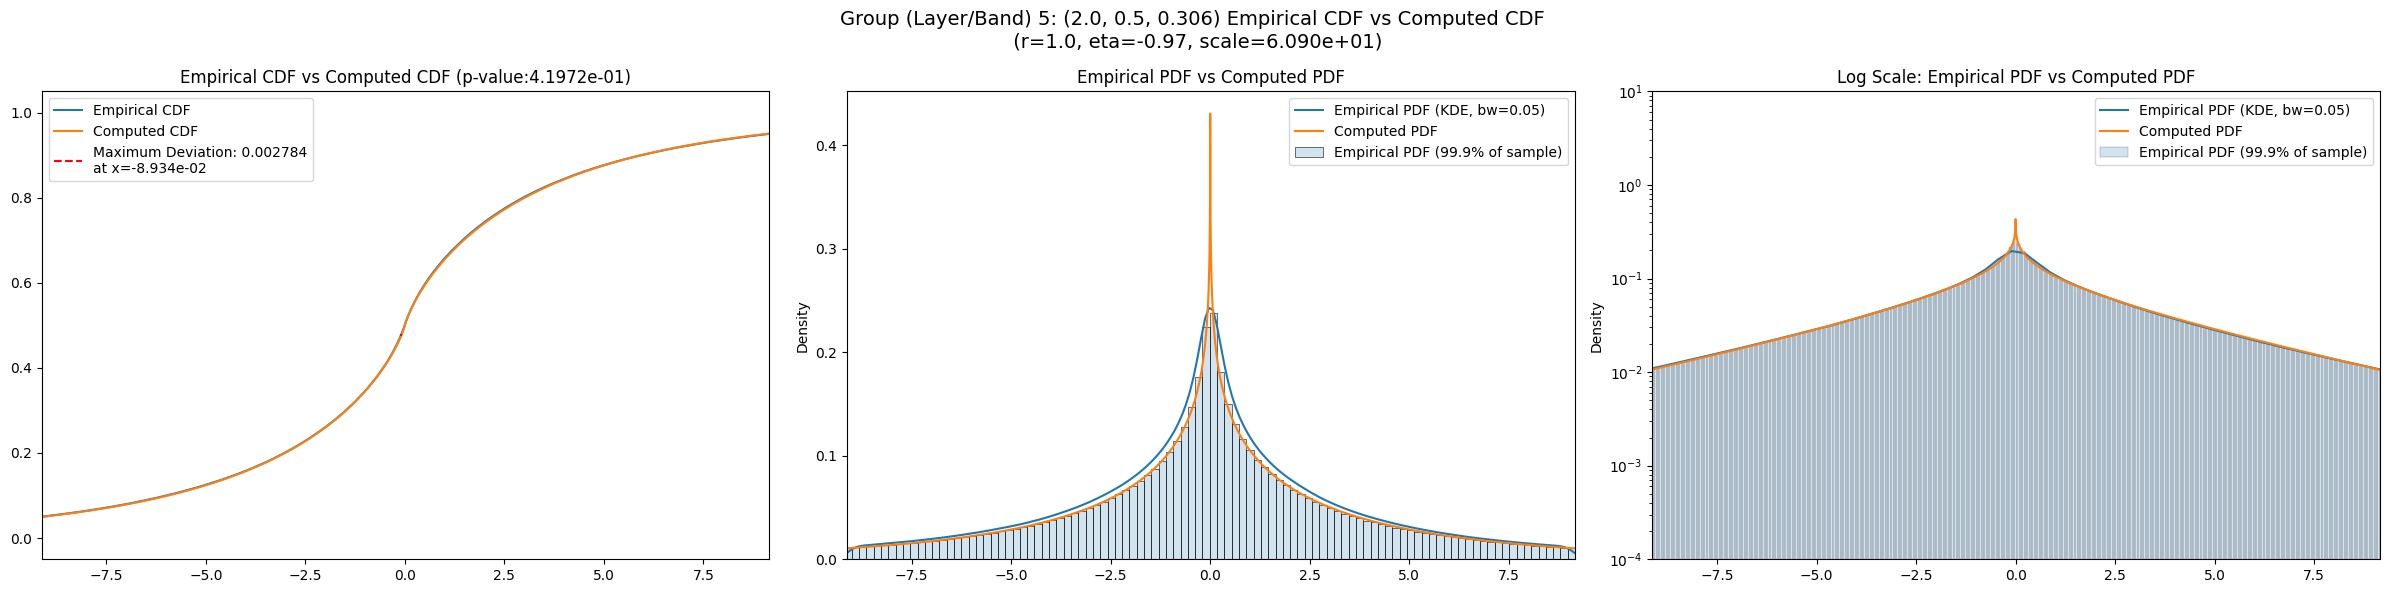

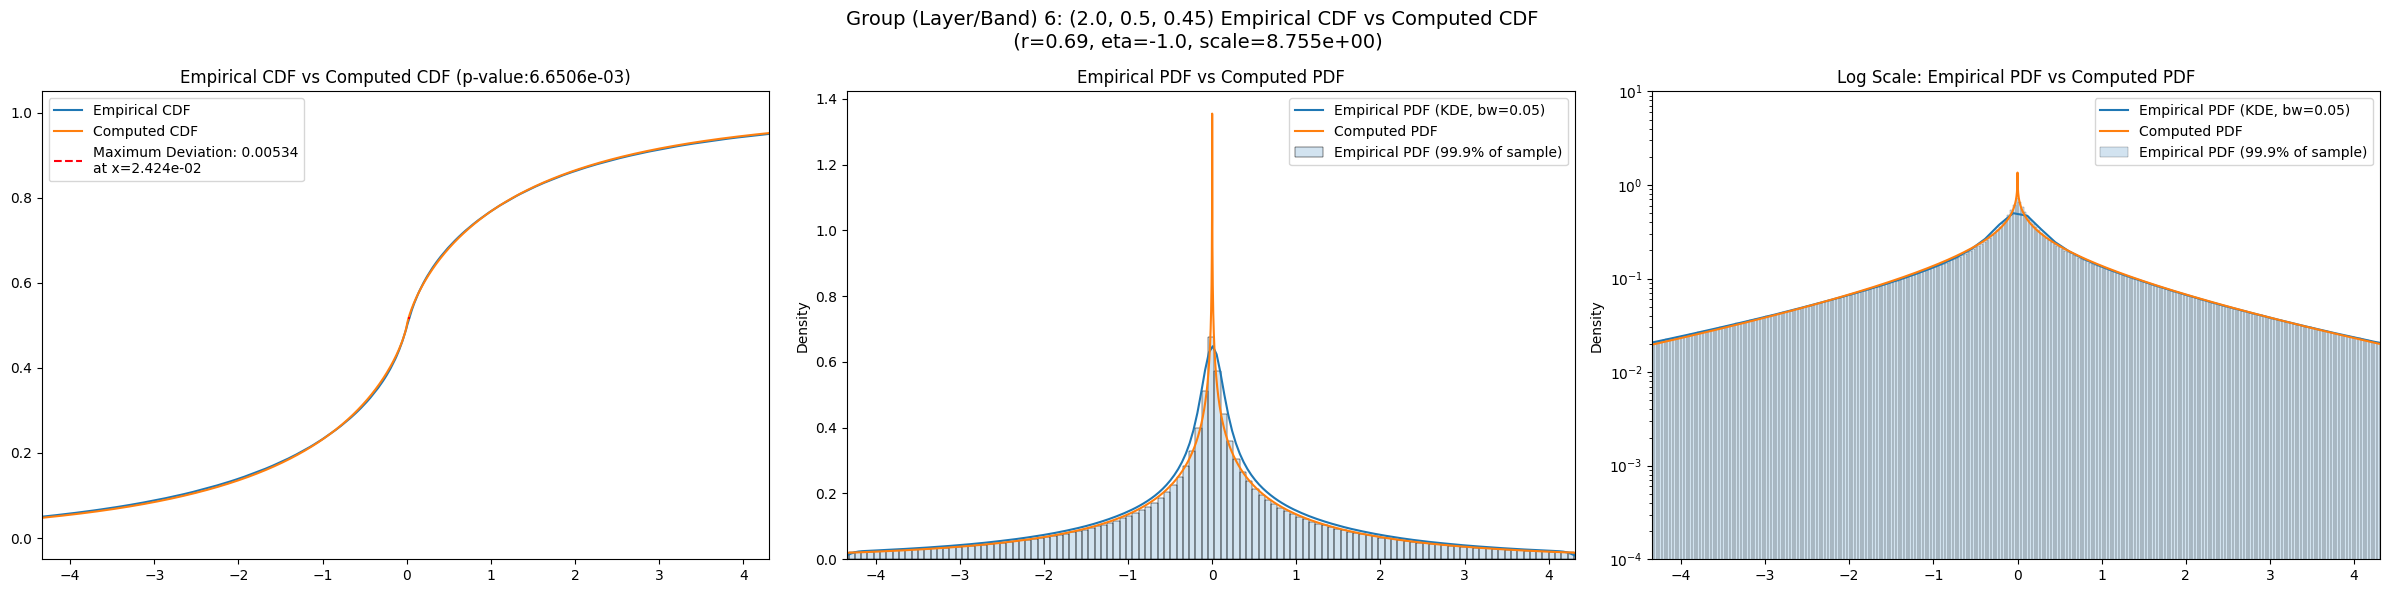

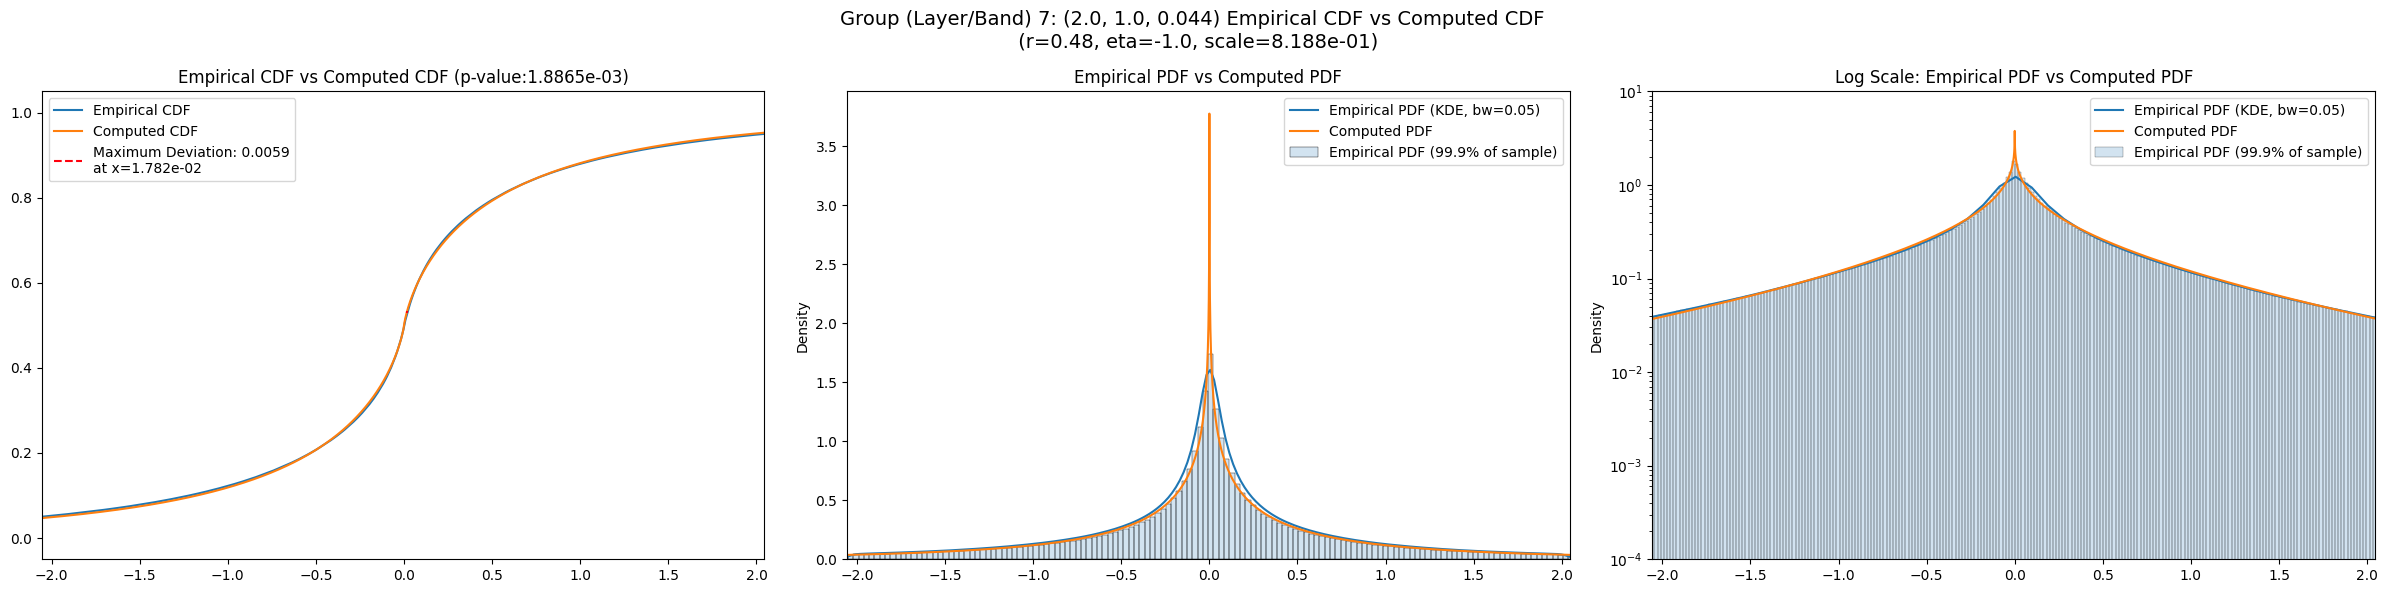

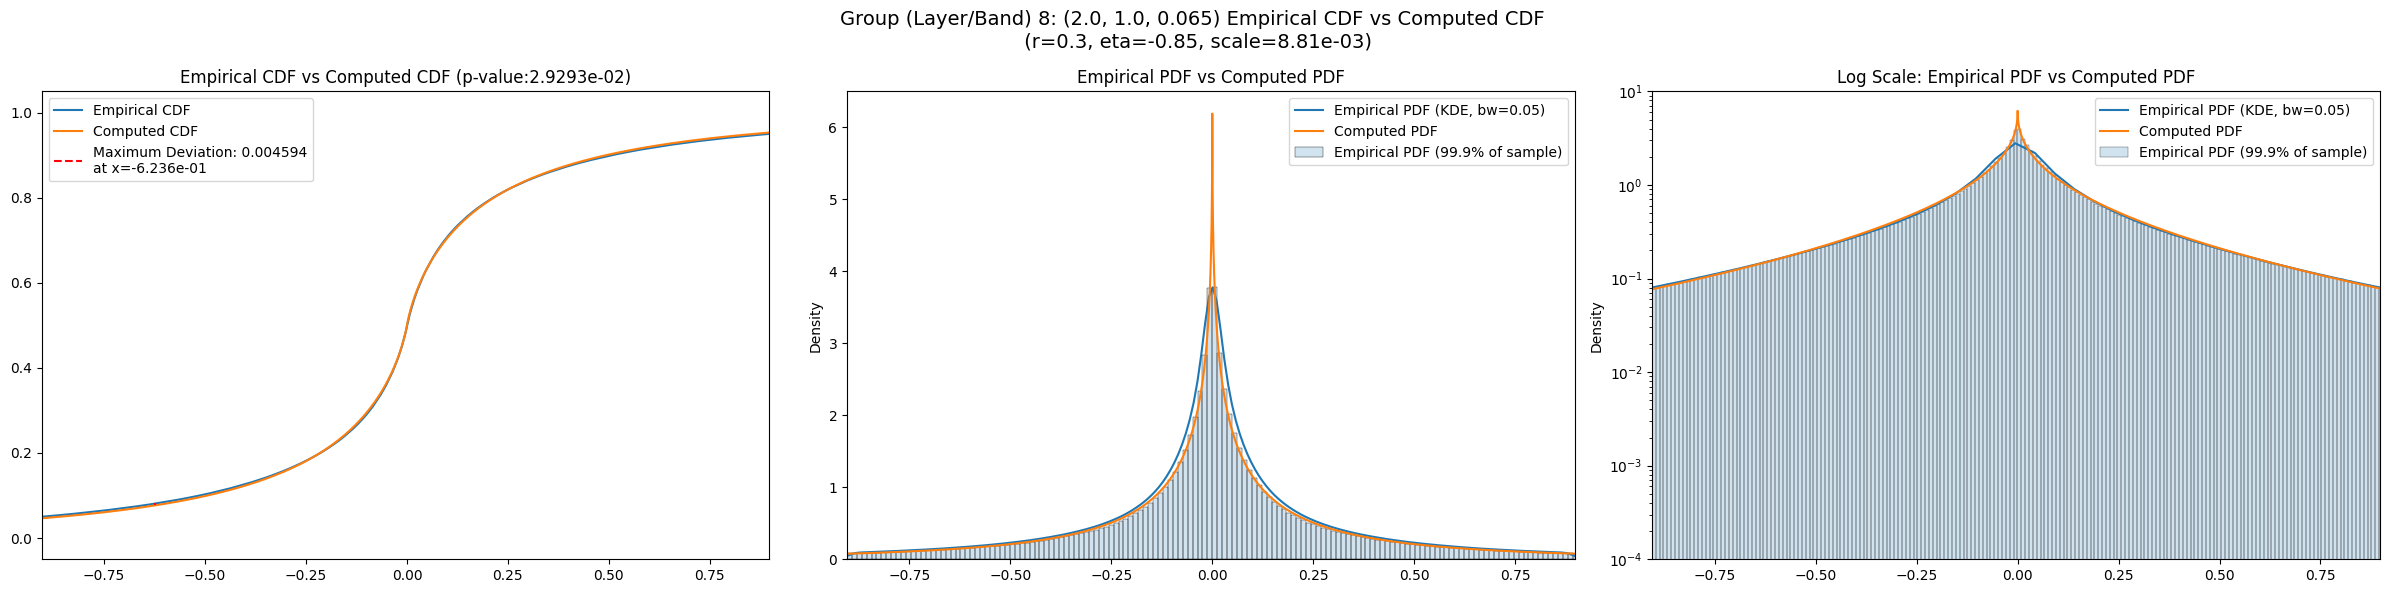

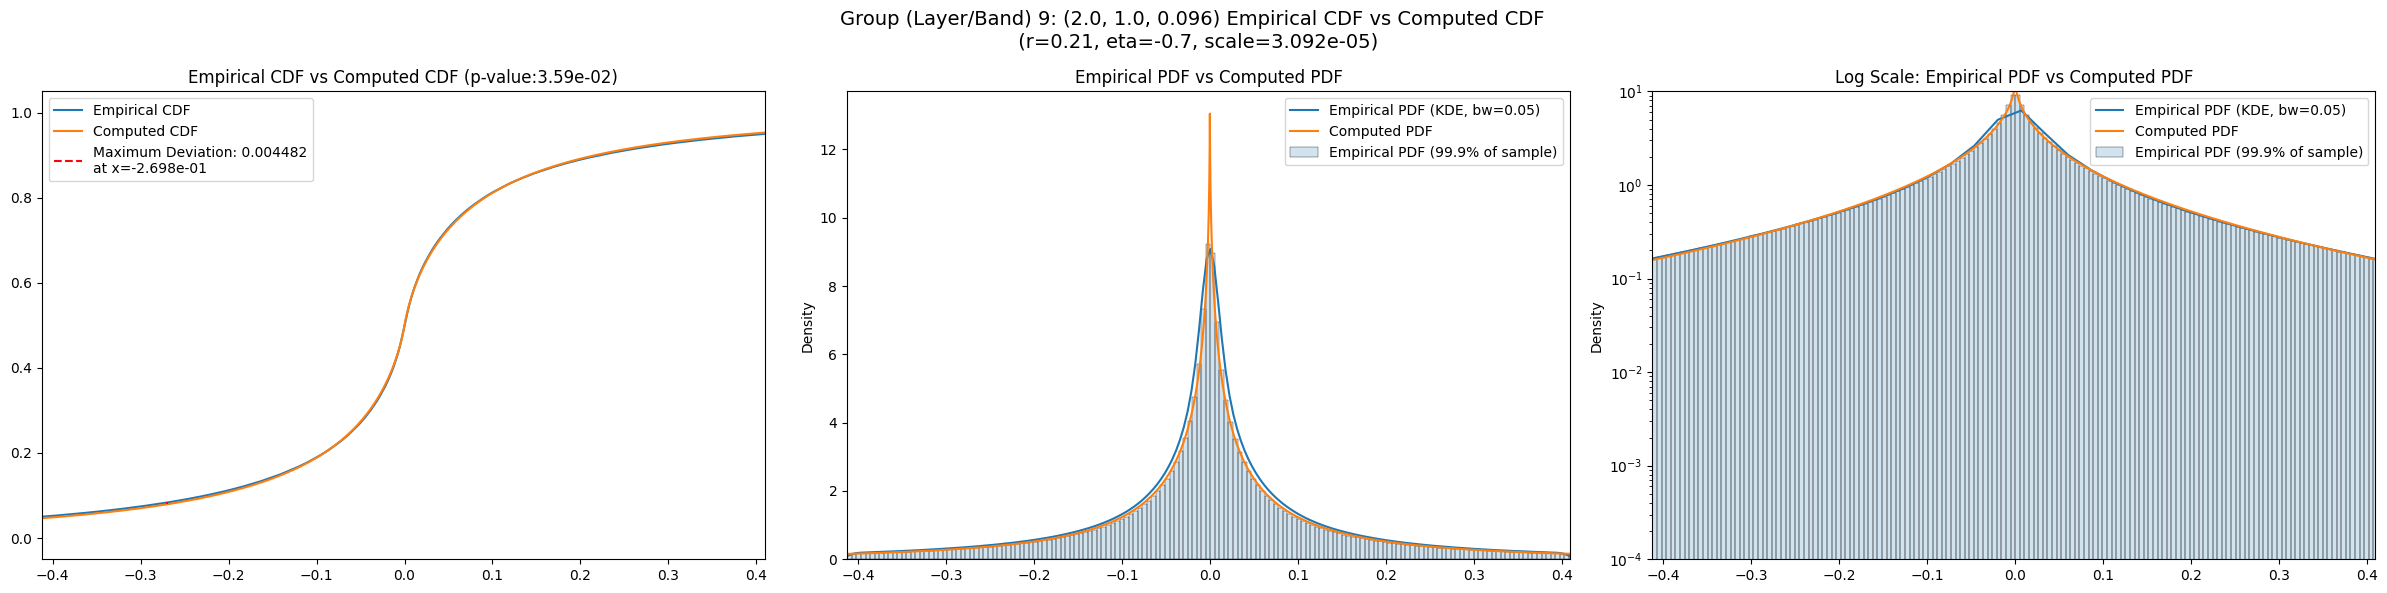

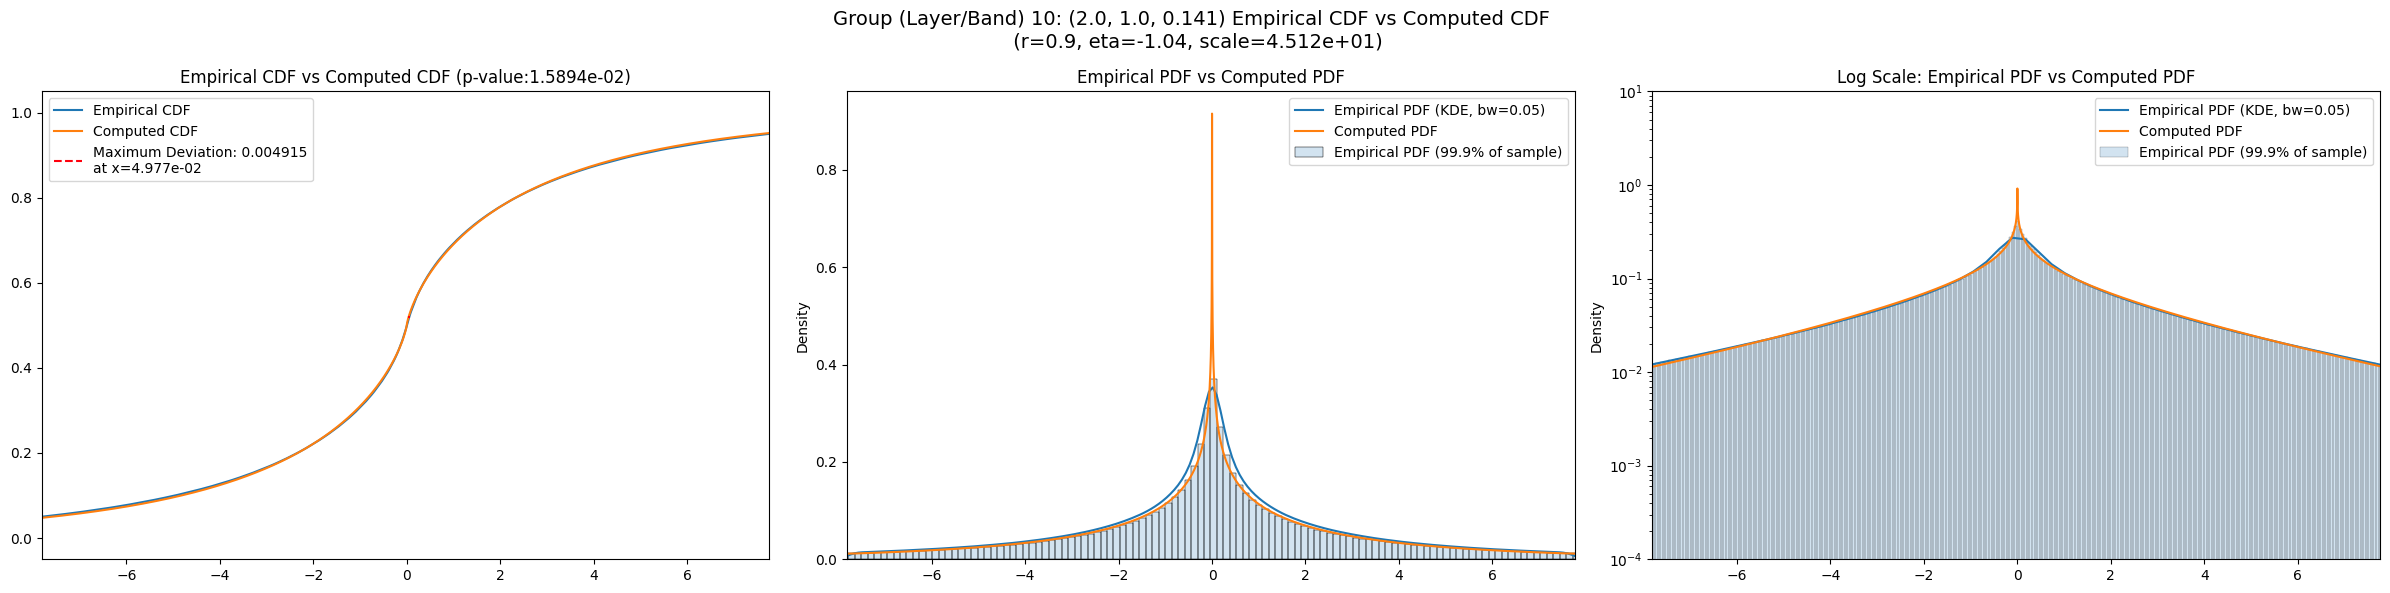

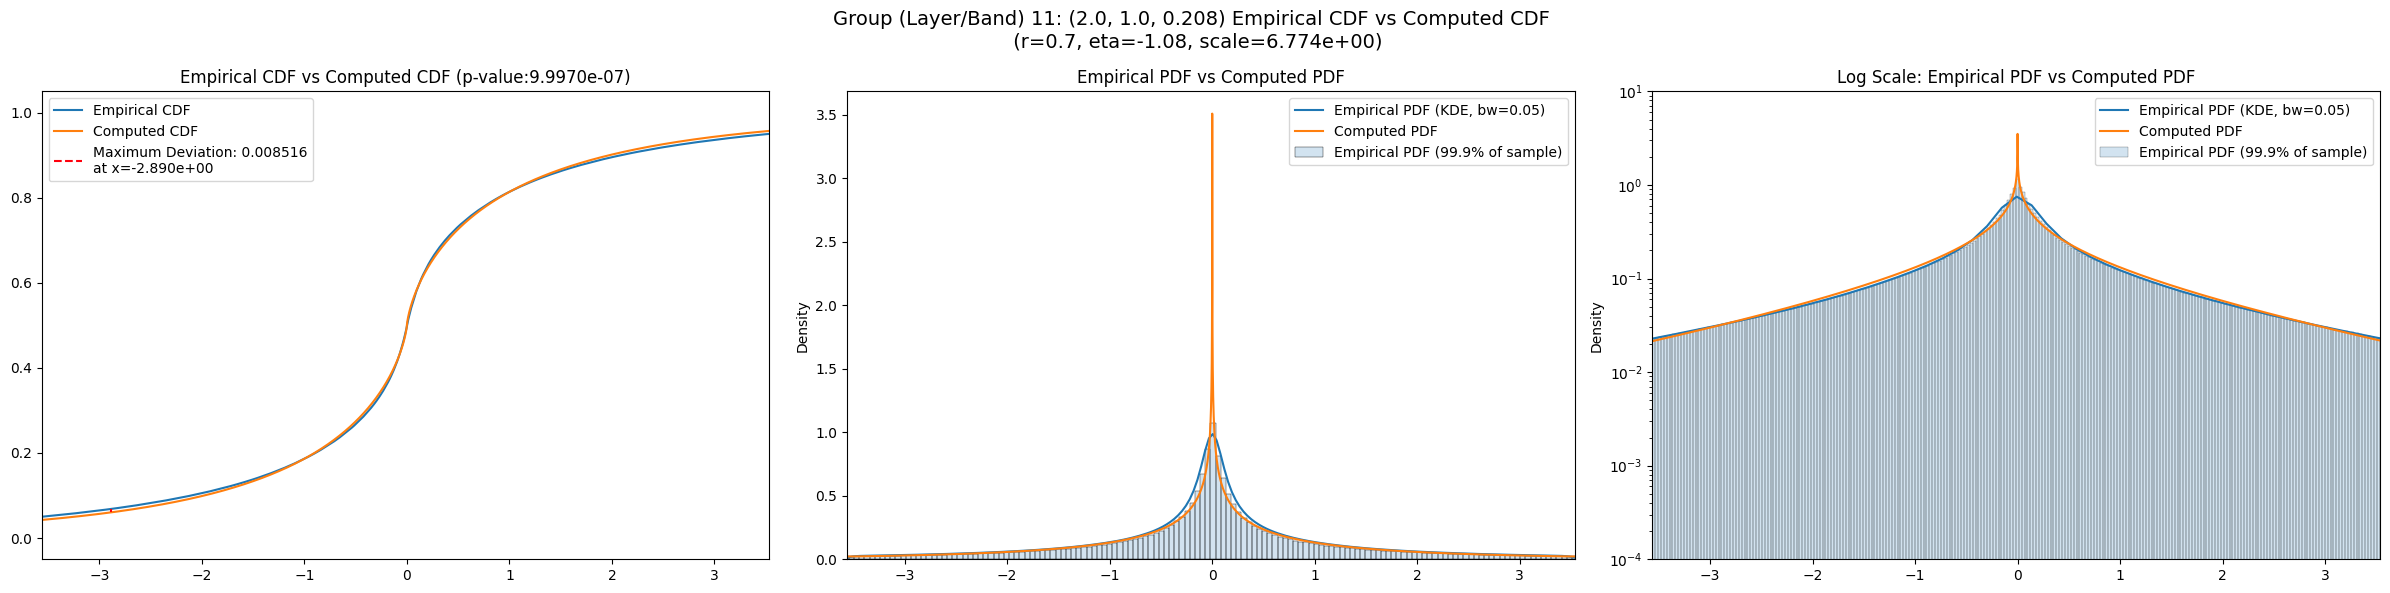

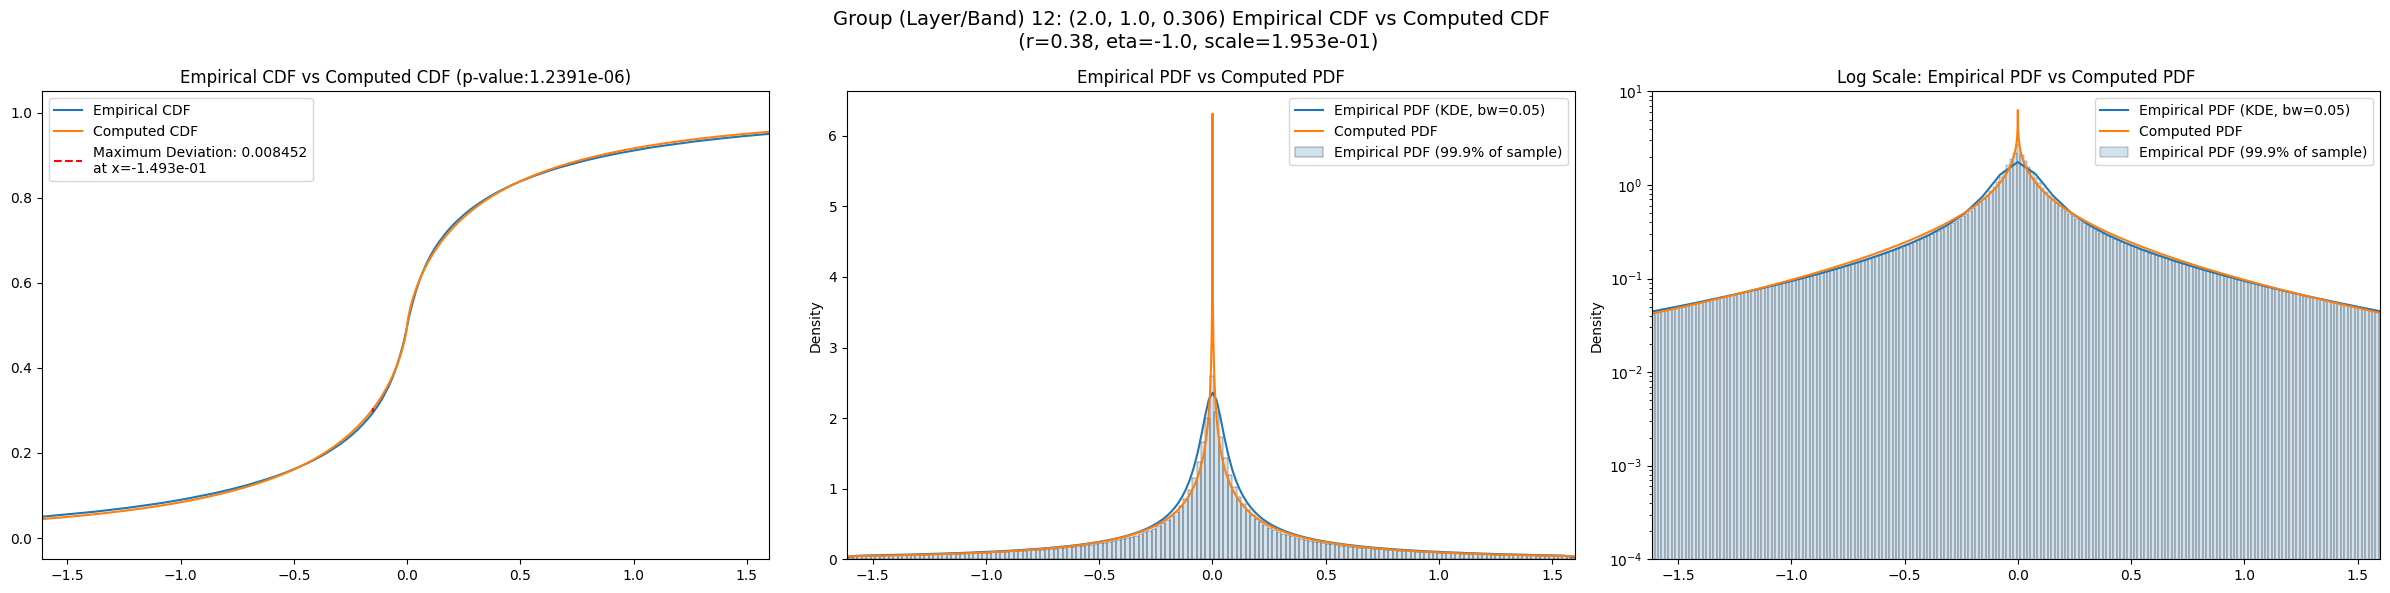

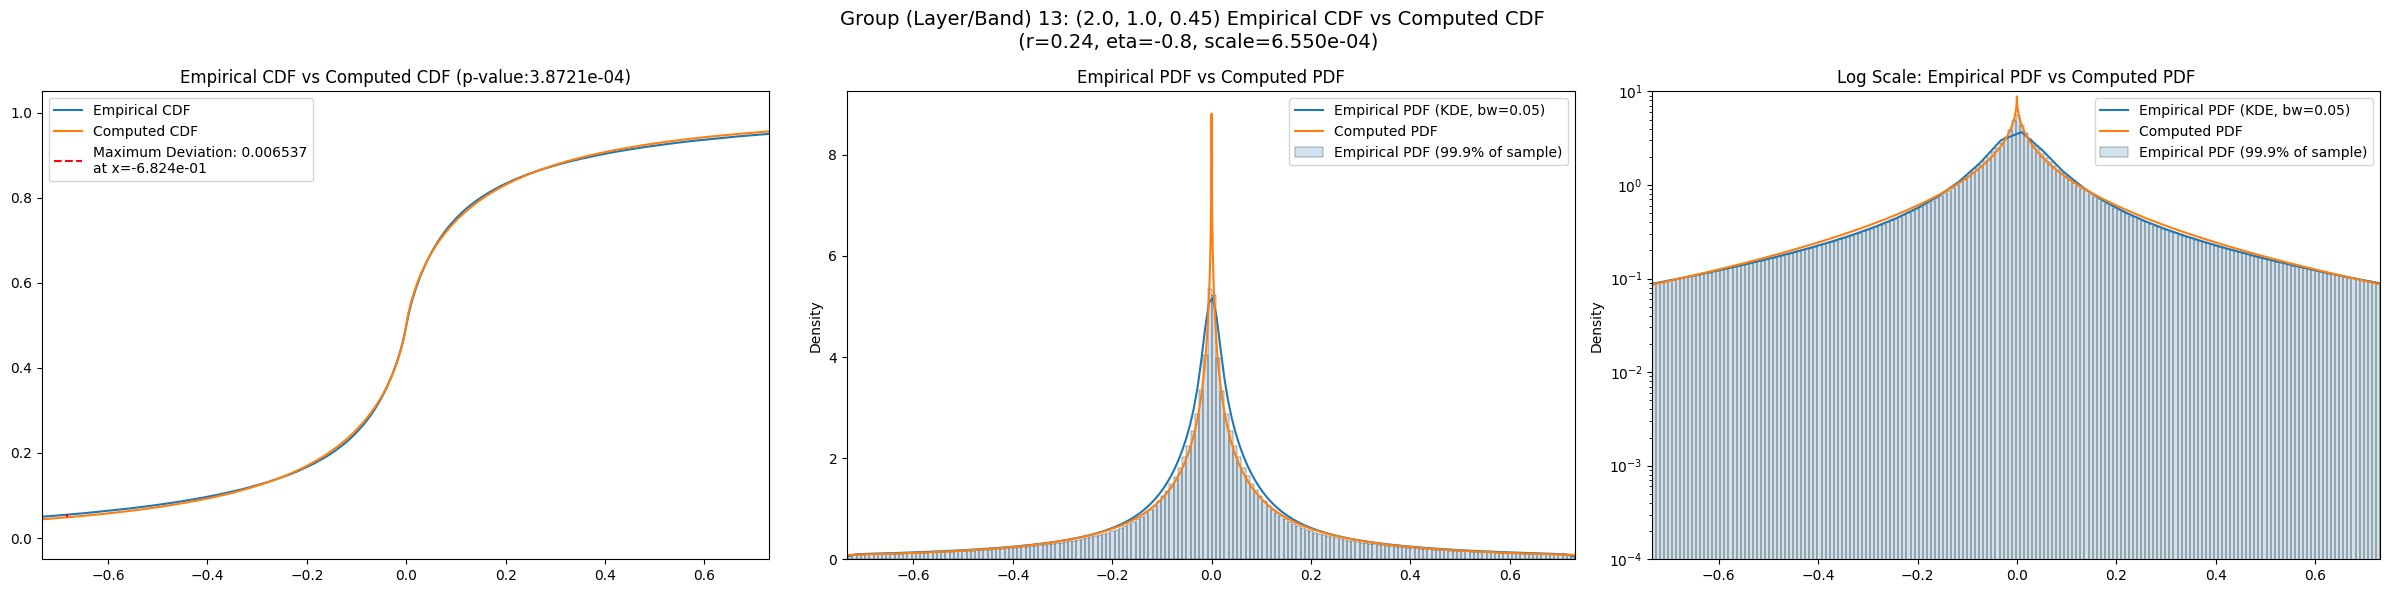

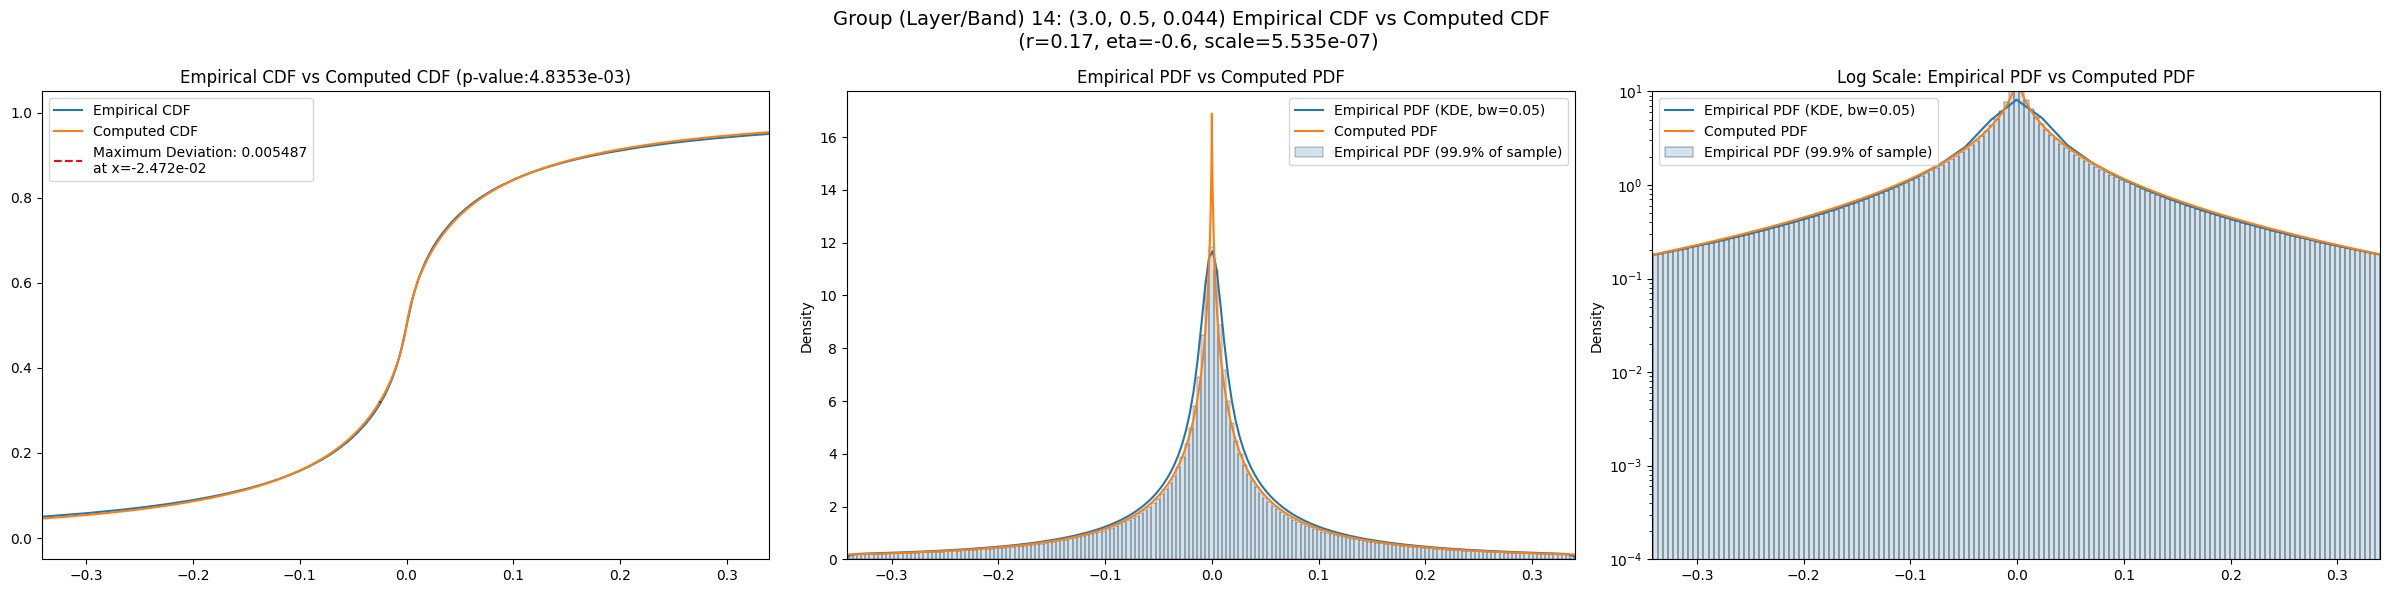

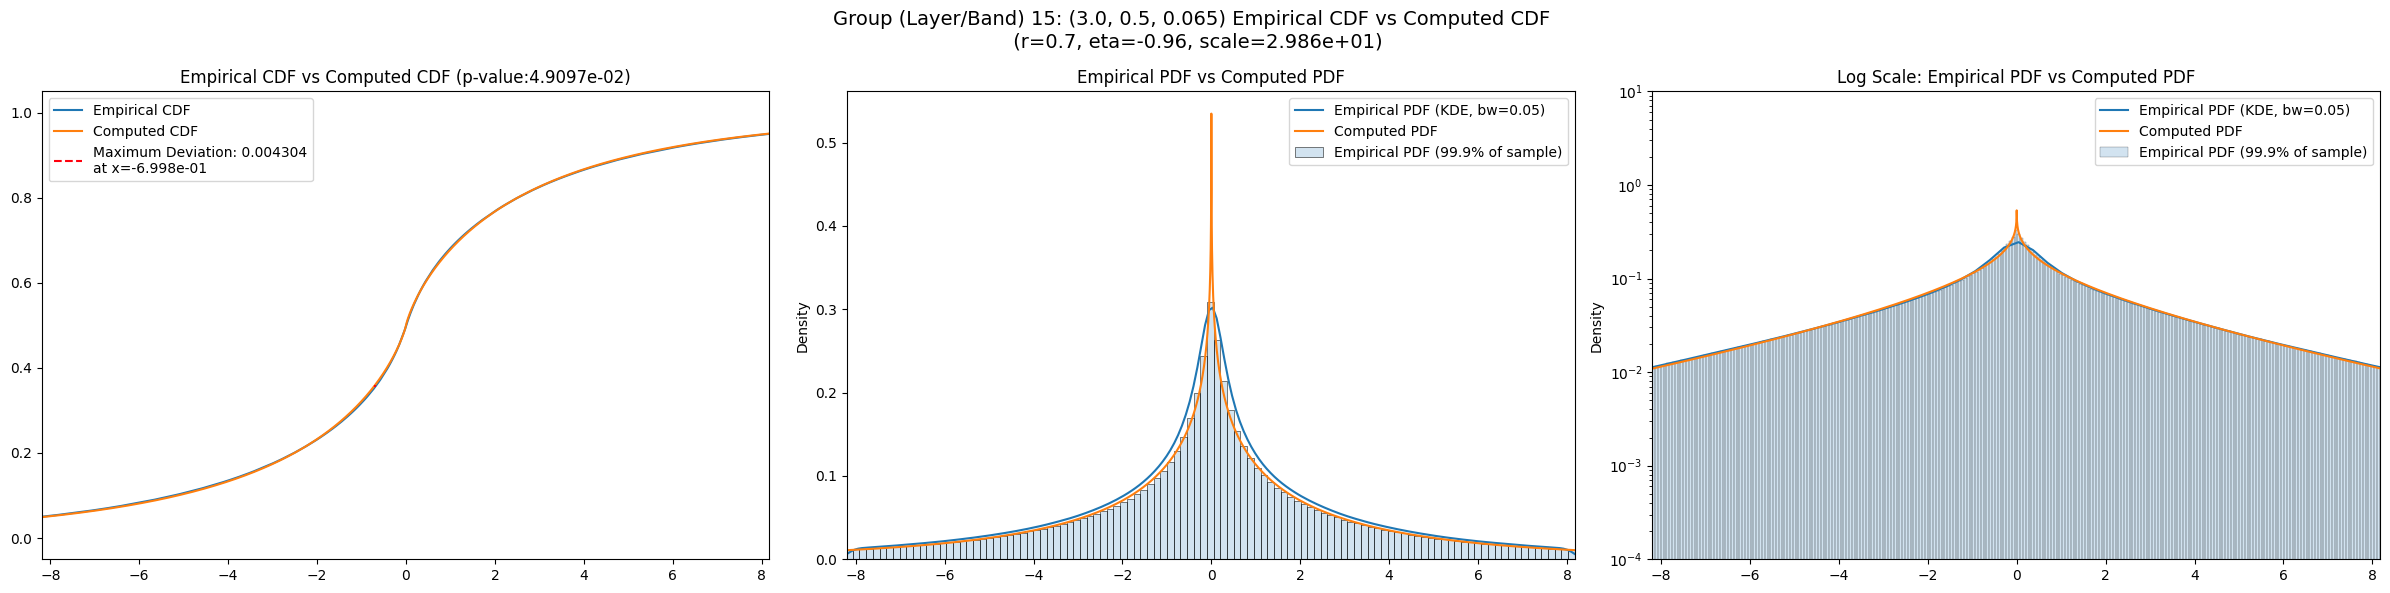

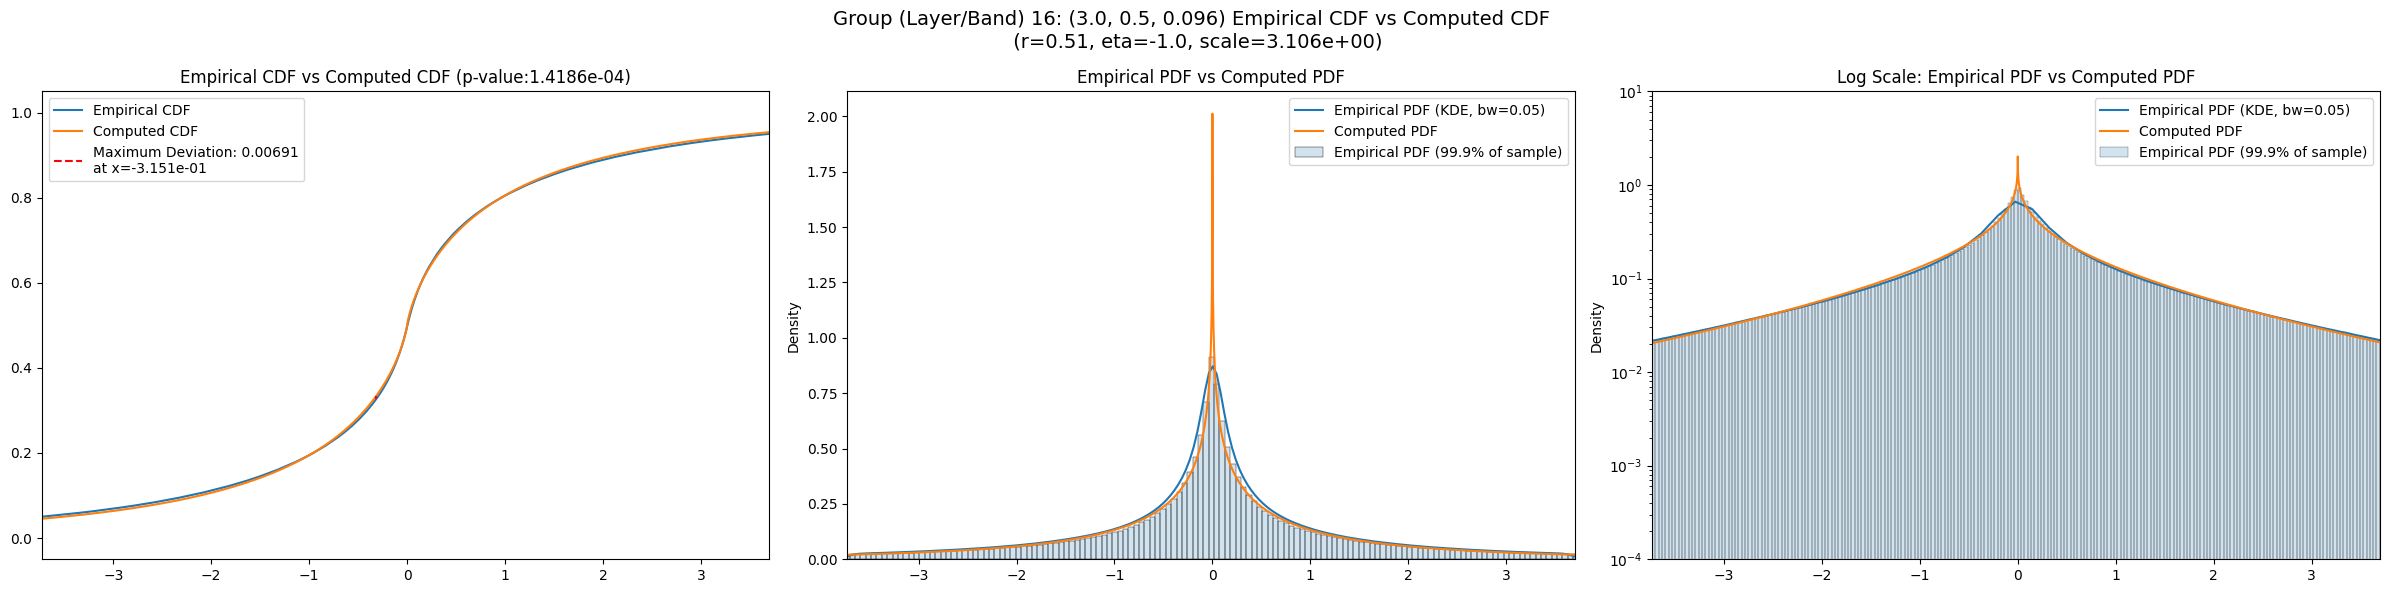

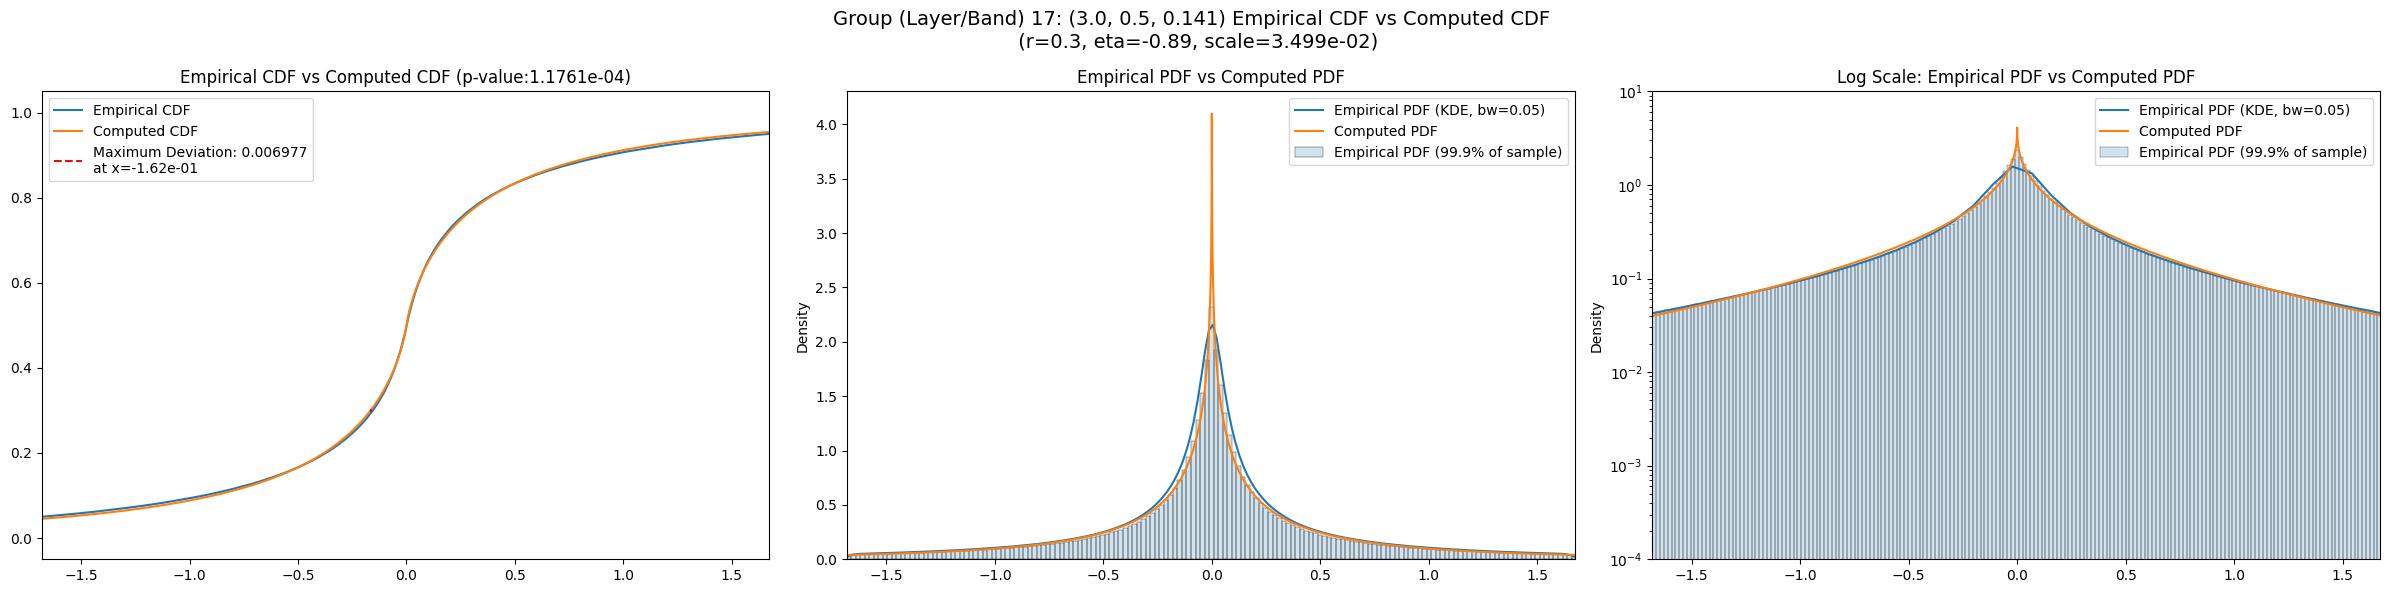

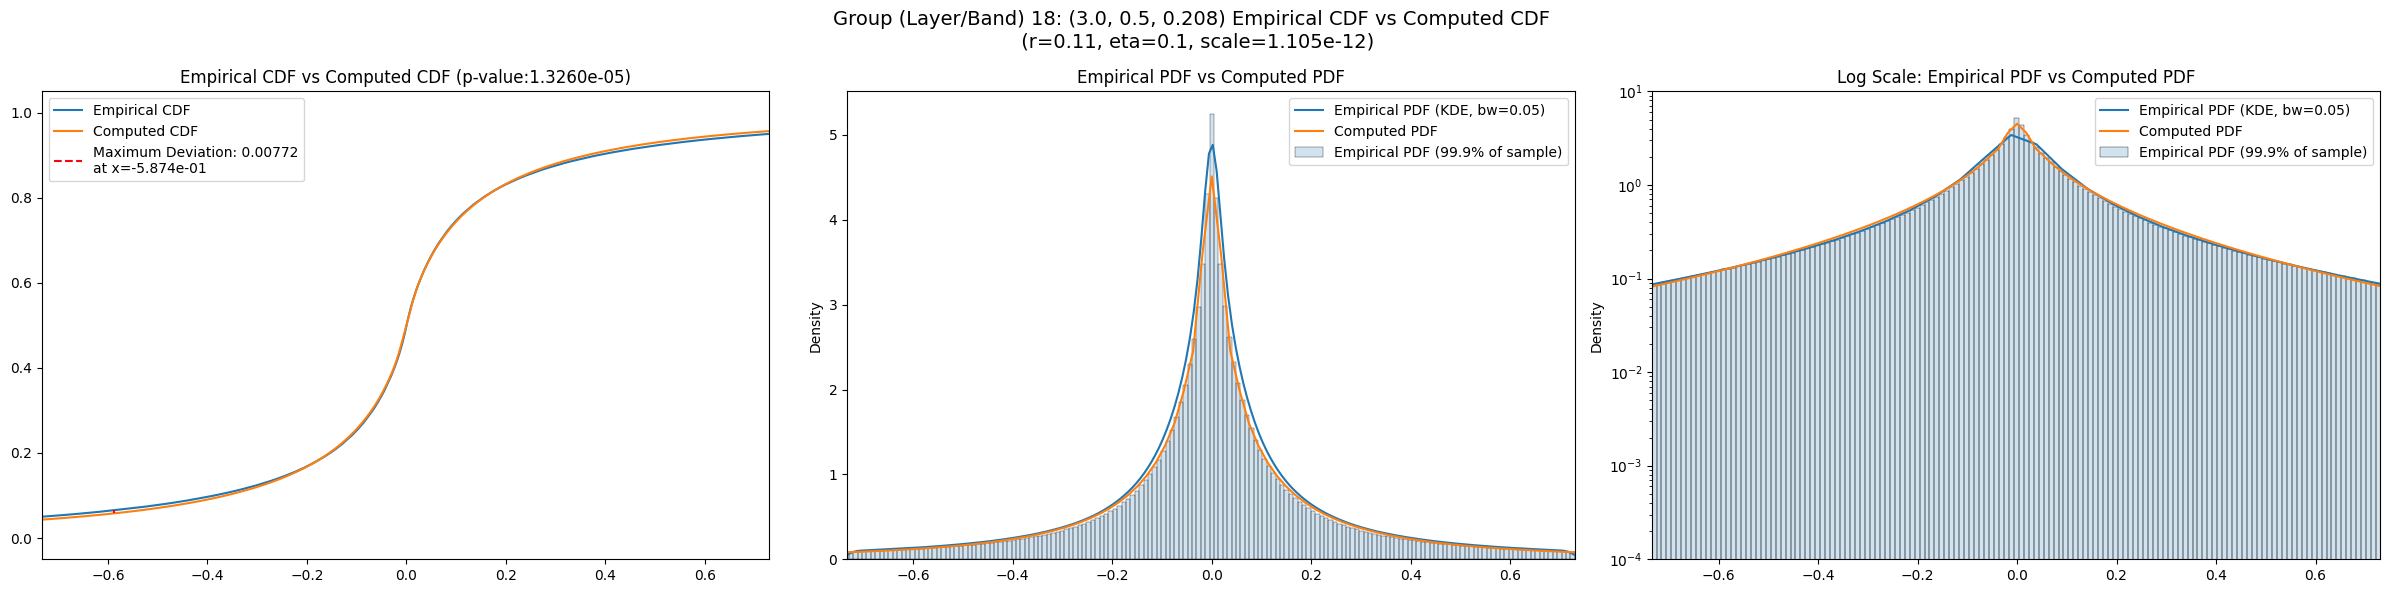

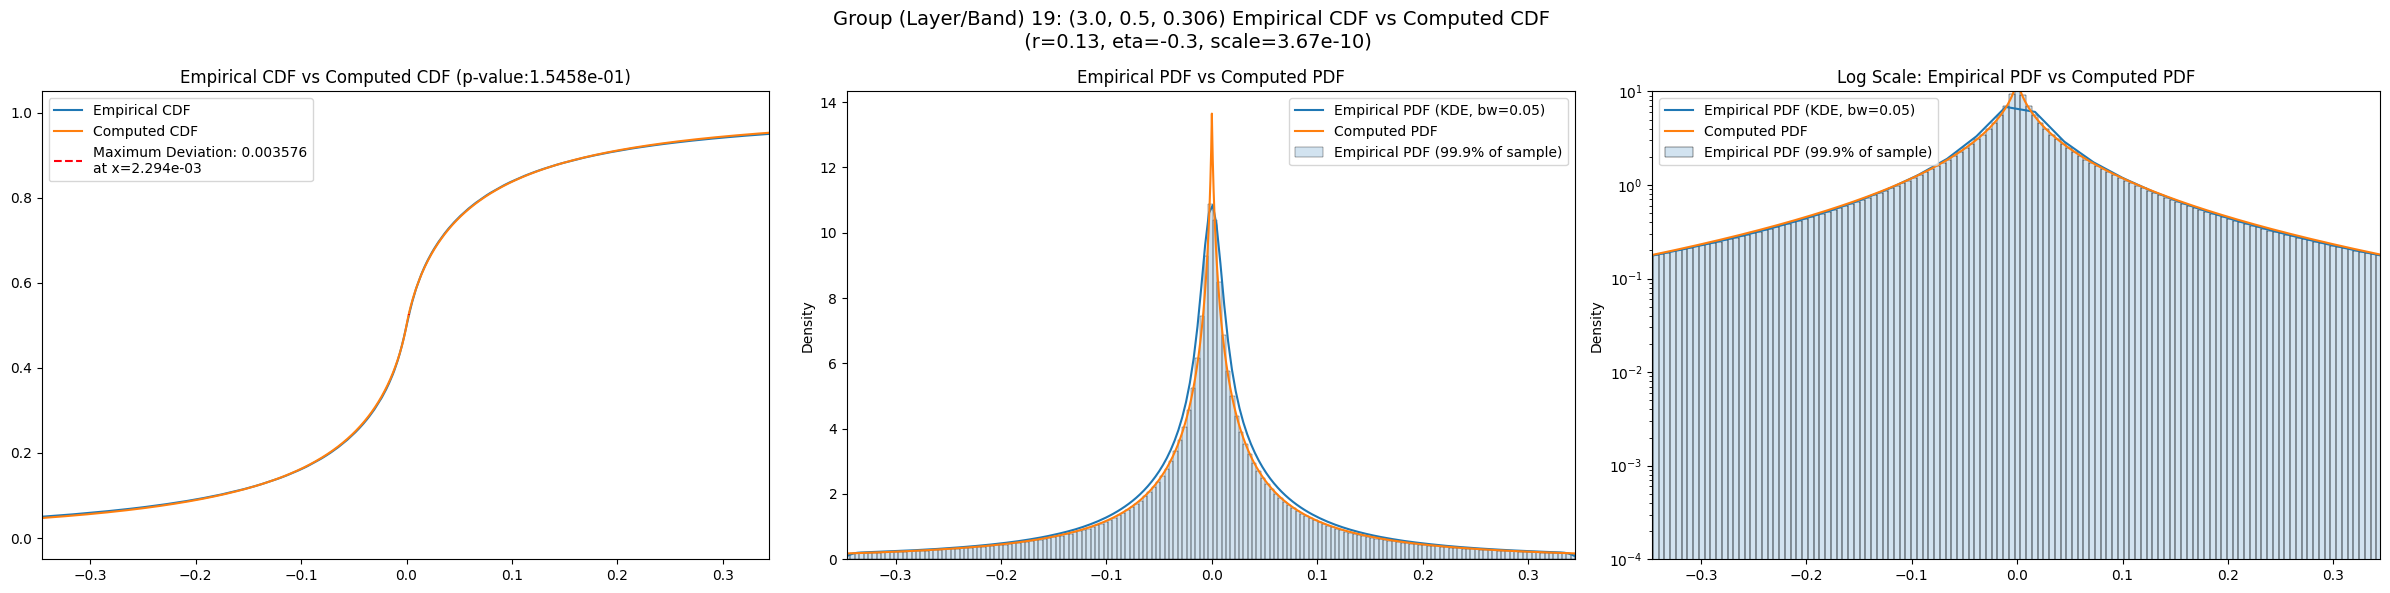

In [15]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    best_scale = group_info['best_scale']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta, best_scale), 
                    log_scale = True,
                    group = f"{group}: {filter_group_map[group]}")
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 100)

## Comparing with Gaussian and Laplace Priors

In [16]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func
    elif distro == 'prior_with_scale':
        def r_eta_scale_func(params):
            r = params[0]
            eta = params[1]
            scale = params[2]
            print(r, eta, scale)
            cdf = compute_prior_cdf(r = r, eta = eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample/ np.sqrt(scale), cdf)
        return r_eta_scale_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior','prior_with_scale', 't'")

In [17]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        if len(group_data_map[group]) == 0:
            continue
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,params,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,filter_group,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
filter_idx,,,,,,,,,,,,,,,,,,,,,
0,"(2.0, 0.5, 0.044)",23.807522,18.785255,30.747663,5.610622,2.439526,32.892960,196608000.0,"(2.0, 0.5, 0.044)",0.006087,...,3.085370,0.057375,0.0,2.644480,0.031817,0.0,2.143960,0.036570,0.0,0.0
1,"(2.0, 0.5, 0.065)",5.429975,4.218070,7.179698,8.194880,3.400279,59.302552,196608000.0,"(2.0, 0.5, 0.065)",0.007747,...,1.252740,0.068488,0.0,1.070700,0.043049,0.0,0.850352,0.046136,0.0,0.0
2,"(2.0, 0.5, 0.096)",1.271452,0.972389,1.702676,10.514228,4.390004,56.975394,196608000.0,"(2.0, 0.5, 0.096)",0.010954,...,0.533682,0.073485,0.0,0.460365,0.047424,0.0,0.361970,0.049127,0.0,0.0
3,"(2.0, 0.5, 0.141)",0.324462,0.230241,0.649374,30.116787,6.351789,266.620959,196608000.0,"(2.0, 0.5, 0.141)",0.007443,...,0.233299,0.073628,0.0,0.203655,0.047502,0.0,0.158257,0.047468,0.0,0.0
4,"(2.0, 0.5, 0.208)",0.075696,0.048990,0.158161,40.344238,9.440216,298.473739,196608000.0,"(2.0, 0.5, 0.208)",0.007319,...,0.095761,0.075561,0.0,0.083766,0.049831,0.0,0.064708,0.049255,0.0,0.0
5,"(2.0, 0.5, 0.306)",32.277842,25.822467,40.224109,6.244556,2.334400,31.309672,196608000.0,"(2.0, 0.5, 0.306)",0.003672,...,3.698880,0.050978,0.0,3.185670,0.024642,0.0,2.582100,0.029321,0.0,0.0
6,"(2.0, 0.5, 0.45)",7.544956,5.816212,10.233245,8.714436,3.558453,64.691319,196608000.0,"(2.0, 0.5, 0.45)",0.005806,...,1.563710,0.061204,0.0,1.339750,0.035460,0.0,1.070680,0.039034,0.0,0.0
7,"(2.0, 1.0, 0.044)",1.885680,1.403464,3.685446,22.288832,5.006912,264.312884,196608000.0,"(2.0, 1.0, 0.044)",0.007285,...,0.659785,0.069106,0.0,0.568568,0.043098,0.0,0.448286,0.045185,0.0,0.0
8,"(2.0, 1.0, 0.065)",0.426052,0.290551,0.793684,28.137059,6.635847,208.915075,196608000.0,"(2.0, 1.0, 0.065)",0.007156,...,0.275849,0.070493,0.0,0.239847,0.044245,0.0,0.187438,0.045040,0.0,0.0


## Results

In [18]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [19]:
master_df.filter(regex="kstest_stat.*")

,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_best,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t
filter_idx,,,,,,
0,0.006087,0.000097,0.005770,0.057375,0.031817,0.036570
1,0.007747,0.000097,0.007016,0.068488,0.043049,0.046136
2,0.010954,0.000097,0.008271,0.073485,0.047424,0.049127
3,0.007443,0.000097,0.006536,0.073628,0.047502,0.047468
4,0.007319,0.000097,0.006589,0.075561,0.049831,0.049255
5,0.003672,0.000097,0.002784,0.050978,0.024642,0.029321
6,0.005806,0.000097,0.005340,0.061204,0.035460,0.039034
7,0.007285,0.000097,0.005900,0.069106,0.043098,0.045185
8,0.007156,0.000097,0.004594,0.070493,0.044245,0.045040


In [20]:
master_df.filter(regex="best.*")

,best_augmented_var,kstest_stat_best,best_r,best_eta,best_scale,best_exclude_cutoff
filter_idx,,,,,,
0,21.329938,0.005770,5.00,-1.09,7.811898e+01,200.0
1,5.072284,0.007016,0.90,-1.09,1.107702e+01,75.0
2,1.271452,0.008271,0.50,-1.03,6.972206e-01,0.0
3,0.324462,0.006536,0.31,-0.90,1.030297e-02,0.0
4,0.075696,0.006589,0.20,-0.69,1.077919e-05,0.0
5,32.277842,0.002784,1.00,-0.97,6.090159e+01,0.0
6,7.544956,0.005340,0.69,-1.00,8.754677e+00,0.0
7,1.885680,0.005900,0.48,-1.00,8.188176e-01,0.0
8,0.426052,0.004594,0.30,-0.85,8.809871e-03,0.0
